![](https://drive.google.com/uc?export=view&id=1pVVPzE29q9f9yAcdr73SWj-5v9nNYkBB)

#***Integrantes***
- Estefania Osma Llanes
- Miguel Angel Parada
- Michael Andrey Maldonado

# ***Introducción:***

> Este dataset proporciona información detallada sobre los delitos ocurridos en el Municipio de Bucaramanga. Incluye datos preliminares de acuerdo con la información recibida por la entidad responsable, que en este caso es la policía local. Los datos se presentan desde el 2010 hasta el año 2021. Es importante tener en cuenta que estos datos pueden ser actualizados dinámicamente a medida que se reciban y procesen los informes de los delitos.

> **Link del dataset**: https://www.datos.gov.co/Seguridad-y-Defensa/Delitos-ocurridos-en-el-Municipio-de-Bucaramanga/75fz-q98y/about_data


### ***Notas Aclaratorias:***

- Los datos presentados son preliminares y están sujetos a cambios a medida que se procesen informes adicionales de delitos.
- El dataset abarca una amplia gama de delitos, incluyendo pero no limitado a robos, hurtos, homicidios, agresiones, entre otros.
- La información se recopila principalmente de los informes policiales presentados por las autoridades locales.
- Se recomienda revisar periódicamente el dataset, ya que los datos pueden ser actualizados conforme se procesen nuevos informes.
- Es posible que algunos detalles específicos de los delitos se omitan por motivos de confidencialidad o seguridad.

# ***Objetivos del Proyecto:***


* Desarrollar un modelo de regresión lineal para predecir la cantidad de delitos en las diferentes zonas del municipio de Bucaramanga.

* Identificar las variables predictoras más significativas que influyen en la cantidad de delitos en cada zona del Municipio de Bucaramanga.


# ***Justificación***

> La seguridad ciudadana es un aspecto fundamental para el bienestar y la calidad de vida de los habitantes de una ciudad; la predicción de la cantidad de delitos en diferentes zonas puede ayudar a las autoridades locales a tomar medidas preventivas y estratégicas para reducir la criminalidad y mejorar la seguridad en esas áreas.

> El uso de técnicas de aprendizaje automático permite analizar datos históricos de delitos y variables socioeconómicas para predecir futuras tendencias delictivas. Esto proporciona una herramienta valiosa para la planificación y asignación de recursos en la lucha contra los indices de criminalidad.




# ***¿QUÉ SE VA A REALIZAR?***
* Recopilación y limpieza de datos.
* Análisis de datos para identificar patrones, tendencias y relaciones entre las variables.
* Selección de variables predictoras.
* Construcción del modelo de regresión lineal.
* Evaluación del modelo.
* Predicción de la cantidad de delitos con el modelo entrenado
* Interpretación de los resultados/Conclusiones.


#📚**LIBRERIAS Y DATASET**💻

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
url = 'https://drive.google.com/uc?id=1kmjYcPXTO7DZesLk4Va1IBbp7PnEi9ZL'
df = pd.read_csv(url)

valores_a_eliminar = ['CORREGIMIENTO 1', 'CORREGIMIENTO 2', 'CORREGIMIENTO 3',
                      'GIRON', 'MEDELLIN', 'PIEDECUESTA', 'BARRANCABERMEJA','FLORIDABLANCA']

df = df[~df['NOM_COMUNA'].isin(valores_a_eliminar)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133829 entries, 0 to 135075
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ORDEN                   133829 non-null  int64 
 1   ARMAS_MEDIOS            133829 non-null  object
 2   BARRIOS_HECHO           133829 non-null  object
 3   LATITUD                 133829 non-null  object
 4   LONGITUD                133829 non-null  object
 5   ZONA                    133829 non-null  object
 6   NOM_COMUNA              133829 non-null  object
 7   ANO                     133829 non-null  int64 
 8   MES                     133829 non-null  object
 9   DIA                     133829 non-null  int64 
 10  DIA_SEMANA              133829 non-null  object
 11  DESCRIPCION_CONDUCTA    133829 non-null  object
 12  CONDUCTA                133829 non-null  object
 13  CLASIFICACIONES DELITO  133829 non-null  object
 14  CURSO_DE_VIDA           133829 non-null  

In [ ]:
df.columns

Index(['ORDEN', 'ARMAS_MEDIOS', 'BARRIOS_HECHO', 'LATITUD', 'LONGITUD', 'ZONA',
       'NOM_COMUNA', 'ANO', 'MES', 'DIA', 'DIA_SEMANA', 'DESCRIPCION_CONDUCTA',
       'CONDUCTA', 'CLASIFICACIONES DELITO', 'CURSO_DE_VIDA',
       'ESTADO_CIVIL_PERSONA', 'GENERO', 'MOVIL_AGRESOR', 'MOVIL_VICTIMA'],
      dtype='object')

In [ ]:
df.head(15)

ORDEN                 ARMAS_MEDIOS              BARRIOS_HECHO  \
0       1  ARMA BLANCA / CORTOPUNZANTE               BUENOS AIRES   
1       2  ARMA BLANCA / CORTOPUNZANTE              CAMPO HERMOSO   
2       3  ARMA BLANCA / CORTOPUNZANTE              CAMPO HERMOSO   
3       4  ARMA BLANCA / CORTOPUNZANTE                  COMUNEROS   
4       5  ARMA BLANCA / CORTOPUNZANTE                   GIRARDOT   
5       6  ARMA BLANCA / CORTOPUNZANTE                   GIRARDOT   
6       7  ARMA BLANCA / CORTOPUNZANTE                LOS ANGELES   
7       8  ARMA BLANCA / CORTOPUNZANTE                     NARIÑO   
8       9  ARMA BLANCA / CORTOPUNZANTE                   PROVENZA   
9      10  ARMA BLANCA / CORTOPUNZANTE                  SOTOMAYOR   
10     11  ARMA BLANCA / CORTOPUNZANTE  URB. BALCONES DE PROVENZA   
11     12  ARMA BLANCA / CORTOPUNZANTE  URB. BALCONES DE PROVENZA   
12     13  ARMA BLANCA / CORTOPUNZANTE  URB. BALCONES DE PROVENZA   
13     14  ARMA BLANCA / CORTOPUNZANTE       BALCONES DEL KENNEDY   
14     15  ARMA BLANCA / CORTOPUNZANTE                  CHAPINERO   

          LATITUD         LONGITUD    ZONA              NOM_COMUNA   ANO  \
0   7,170,557,382      -73,135,108  URBANA           14. MORRORICO  2010   
1   7,120,645,358       -7,312,605  URBANA       05. GARCÍA ROVIRA  2010   
2   7,120,645,358       -7,312,605  URBANA       05. GARCÍA ROVIRA  2010   
3     715,135,927  -73,145,704,583  URBANA       03. SAN FRANCISCO  2010   
4   7,170,557,382      -73,135,108  URBANA          04. OCCIDENTAL  2010   
5   7,170,557,382      -73,135,108  URBANA          04. OCCIDENTAL  2010   
6   7,187,455,129  -73,131,726,904  URBANA        02. NOR ORIENTAL  2010   
7     715,655,391  -73,140,753,417  URBANA          04. OCCIDENTAL  2010   
8   7,120,001,072  -73,116,084,261  URBANA            10. PROVENZA  2010   
9   7,161,314,229  -73,139,956,655  URBANA  12. CABECERA DEL LLANO  2010   
10  7,078,450,597  -73,124,979,028  URBANA                 11. SUR  2010   
11  7,078,450,597  -73,124,979,028  URBANA                 11. SUR  2010   
12  7,078,450,597  -73,124,979,028  URBANA                 11. SUR  2010   
13    715,605,983  -73,137,724,323  URBANA               01. NORTE  2010   
14      7,156,937      -73,141,107  URBANA       03. SAN FRANCISCO  2010   

          MES  DIA   DIA_SEMANA               DESCRIPCION_CONDUCTA  \
0   01. ENERO    1  05. VIERNES  ARTÍCULO 111. LESIONES PERSONALES   
1   01. ENERO    1  05. VIERNES  ARTÍCULO 111. LESIONES PERSONALES   
2   01. ENERO    1  05. VIERNES  ARTÍCULO 111. LESIONES PERSONALES   
3   01. ENERO    1  05. VIERNES  ARTÍCULO 111. LESIONES PERSONALES   
4   01. ENERO    1  05. VIERNES  ARTÍCULO 111. LESIONES PERSONALES   
5   01. ENERO    1  05. VIERNES  ARTÍCULO 111. LESIONES PERSONALES   
6   01. ENERO    1  05. VIERNES  ARTÍCULO 111. LESIONES PERSONALES   
7   01. ENERO    1  05. VIERNES  ARTÍCULO 111. LESIONES PERSONALES   
8   01. ENERO    1  05. VIERNES  ARTÍCULO 111. LESIONES PERSONALES   
9   01. ENERO    1  05. VIERNES  ARTÍCULO 111. LESIONES PERSONALES   
10  01. ENERO    1  05. VIERNES  ARTÍCULO 111. LESIONES PERSONALES   
11  01. ENERO    1  05. VIERNES  ARTÍCULO 111. LESIONES PERSONALES   
12  01. ENERO    1  05. VIERNES  ARTÍCULO 111. LESIONES PERSONALES   
13  01. ENERO    1  05. VIERNES     ARTÍCULO 239. HURTO A PERSONAS   
14  01. ENERO    1  05. VIERNES     ARTÍCULO 239. HURTO A PERSONAS   

               CONDUCTA CLASIFICACIONES DELITO CURSO_DE_VIDA  \
0   LESIONES PERSONALES    LESIONES NO FATALES   05. ADULTEZ   
1   LESIONES PERSONALES    LESIONES NO FATALES   04. JOVENES   
2   LESIONES PERSONALES    LESIONES NO FATALES   04. JOVENES   
3   LESIONES PERSONALES    LESIONES NO FATALES   05. ADULTEZ   
4   LESIONES PERSONALES    LESIONES NO FATALES   04. JOVENES   
5   LESIONES PERSONALES    LESIONES NO FATALES   04. JOVENES   
6   LESIONES PERSONALES    LESIONES NO FATALES   04. JOVENES   
7   LESIONES PERSONALES    LESIONES NO FATALES   

#💁‍♂️**GRAFICAS PARA ANALIZAR**👩‍💻

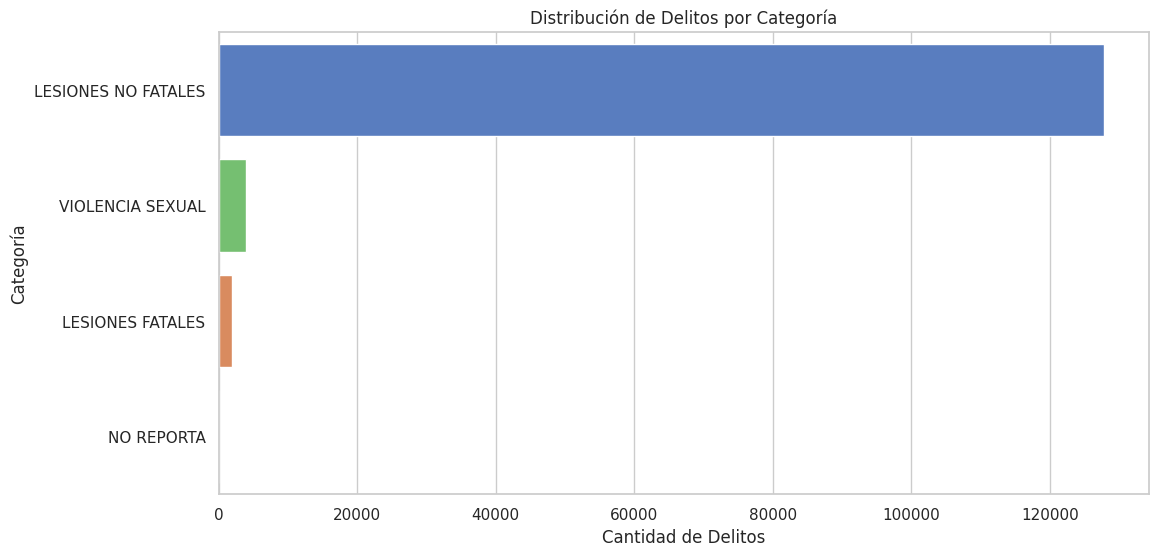

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.countplot(y='CLASIFICACIONES DELITO', data=df, order=df['CLASIFICACIONES DELITO'].value_counts().index, hue='CLASIFICACIONES DELITO', palette='muted', legend=False)
plt.title('Distribución de Delitos por Categoría')
plt.xlabel('Cantidad de Delitos')
plt.ylabel('Categoría')
plt.show()

  * Esta gráfica de "Distribución de Delitos por Categoría" sugiere que hay más delitos que caen en las categorías "Lesiones No Fatales" y "Violencia Sexual", mientras que las categorías "Lesiones Fatales" y "No Reporta" tienen menos delitos.

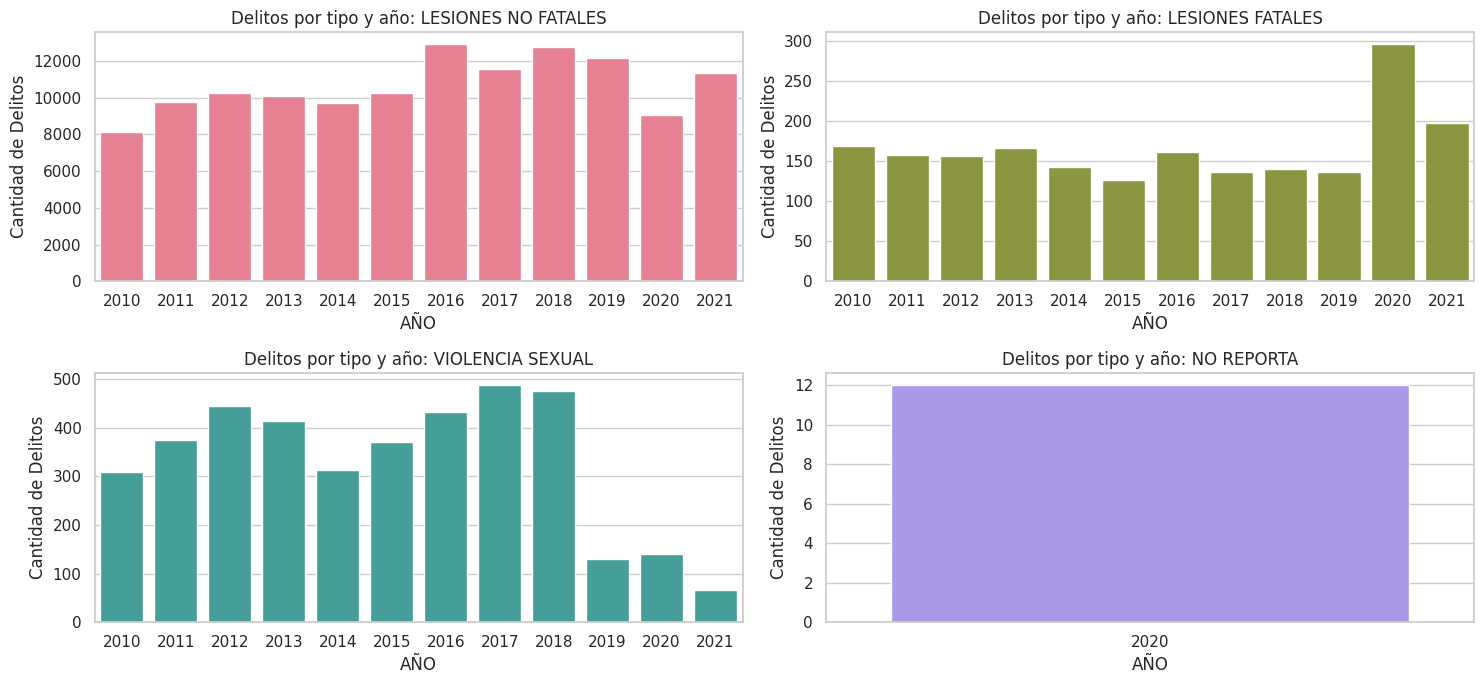

In [ ]:
tipos_delito = df['CLASIFICACIONES DELITO'].unique()

colores = sns.color_palette("husl", len(tipos_delito))

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))

for i, (tipo, color) in enumerate(zip(tipos_delito, colores)):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    sns.countplot(x='ANO', data=df[df['CLASIFICACIONES DELITO']==tipo], ax=ax, color=color)
    ax.set_title('Delitos por tipo y año: {}'.format(tipo))
    ax.set_xlabel('AÑO')
    ax.set_ylabel('Cantidad de Delitos')

plt.tight_layout()
plt.show()

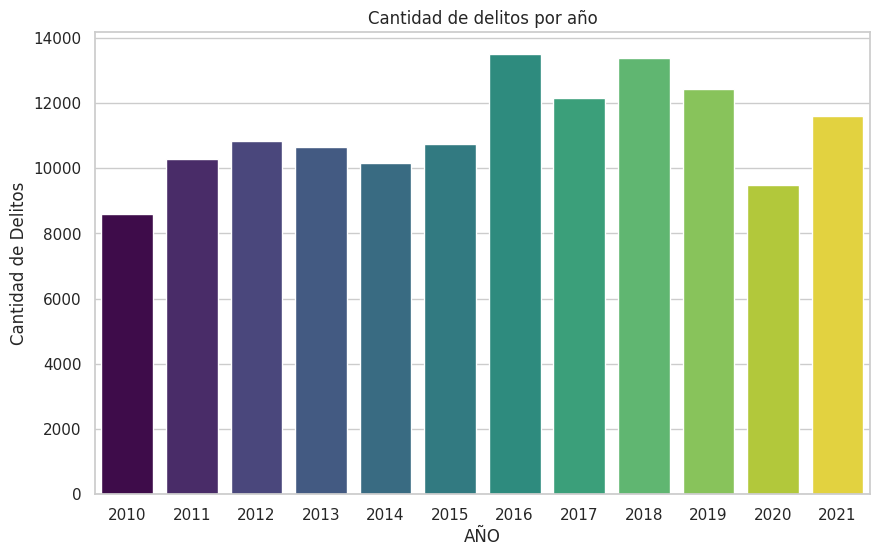

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='ANO', data=df, hue='ANO', palette='viridis', legend=False)
plt.title('Cantidad de delitos por año')
plt.xlabel('AÑO')
plt.ylabel('Cantidad de Delitos')
plt.show()

* El número de delitos ha ido disminuyendo con el tiempo, con un ligero aumento de 2020 a 2021.
* Entre los años 2016 a 2018 hubo el mayor número de delitos en el período de tiempo indicado.
* Los años 2019, 2020 y 2021 muestran una tendencia decreciente, pero hay un ligero aumento de 2020 a 2021.

Con estos datos, parece que el número de delitos está disminuyendo en general, pero hay un ligero aumento de 2020 a 2021.

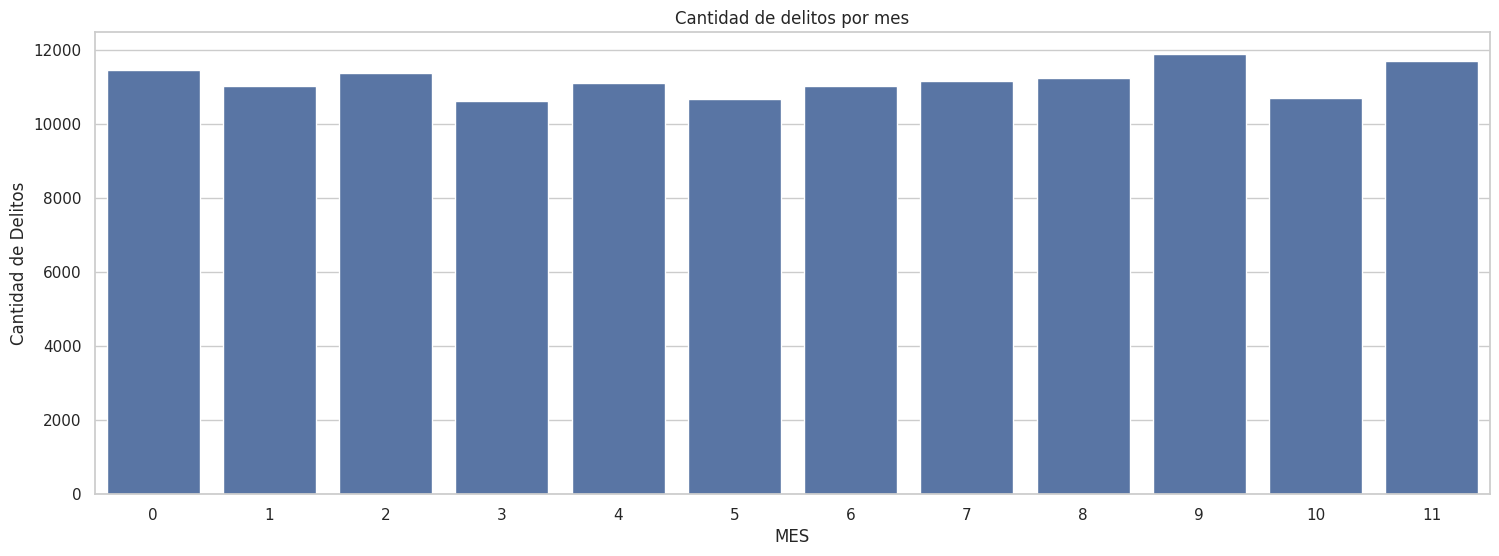

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='MES', data=df)
plt.title('Cantidad de delitos por mes')
plt.xlabel('MES')
plt.ylabel('Cantidad de Delitos')
plt.show()

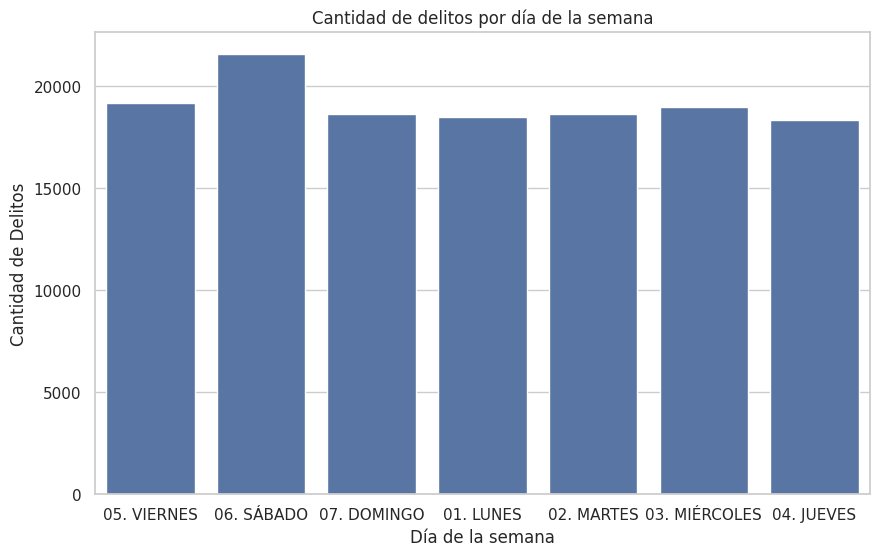

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='DIA_SEMANA', data=df)
plt.title('Cantidad de delitos por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de Delitos')
plt.show()

In [ ]:

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.countplot(y='MOVIL_AGRESOR', data=df, order=df['MOVIL_AGRESOR'].value_counts().index,color='blue')
plt.title('Medio de transporte del agresor')
plt.xlabel('Cantidad de Delitos')
plt.ylabel('Medio de transporte')

plt.subplot(1,2,2)
sns.countplot(y='MOVIL_VICTIMA', data=df, order=df['MOVIL_VICTIMA'].value_counts().index,color='red')
plt.title('Medio de transporte de la víctima')
plt.xlabel('Cantidad de Delitos')
plt.ylabel('Categoría')

plt.tight_layout()
plt.show()

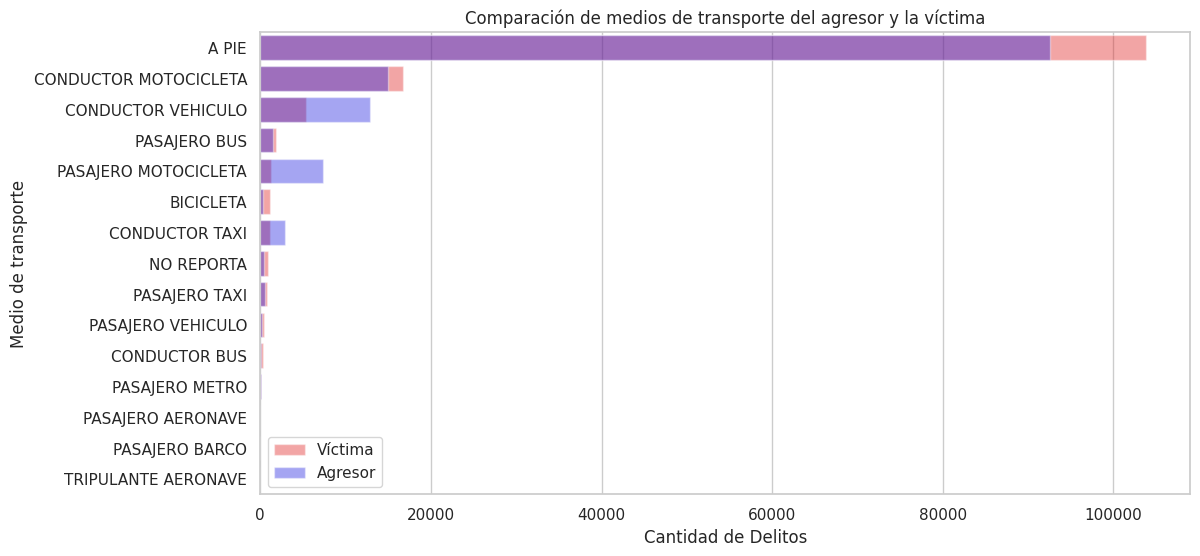

In [ ]:
plt.figure(figsize=(12, 6))

sns.countplot(y='MOVIL_VICTIMA', data=df, order=df['MOVIL_VICTIMA'].value_counts().index, color='red', alpha=0.4, label='Víctima')
sns.countplot(y='MOVIL_AGRESOR', data=df, order=df['MOVIL_AGRESOR'].value_counts().index, color='blue', alpha=0.4, label='Agresor')


plt.title('Comparación de medios de transporte del agresor y la víctima')
plt.xlabel('Cantidad de Delitos')
plt.ylabel('Medio de transporte')
plt.legend()

plt.show()

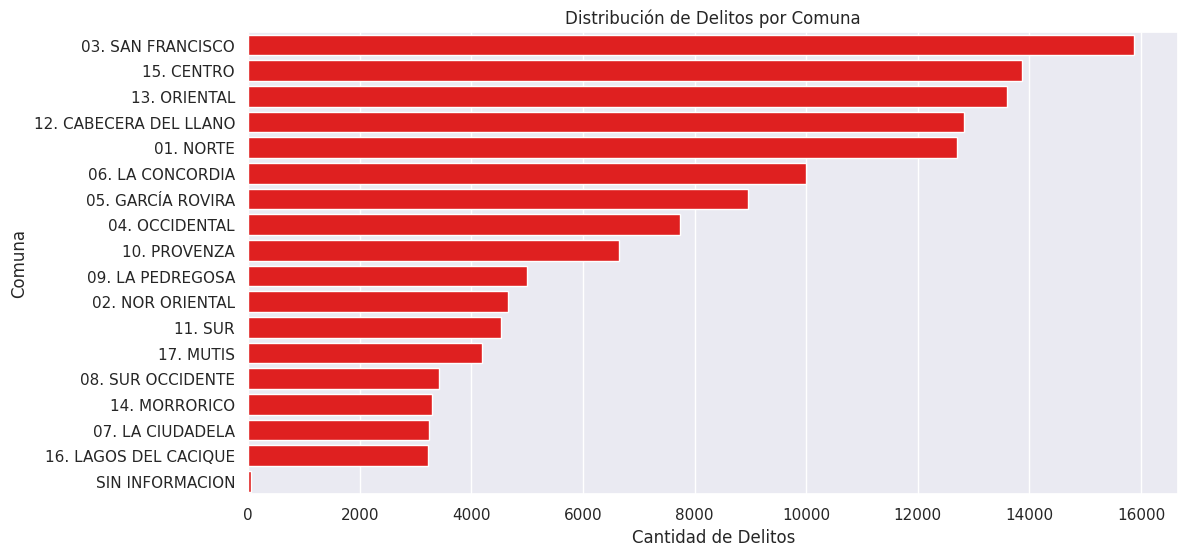

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y='NOM_COMUNA', data=df, order=df['NOM_COMUNA'].value_counts().index, color='red')
plt.title('Distribución de Delitos por Comuna')
plt.xlabel('Cantidad de Delitos')
plt.ylabel('Comuna')
plt.show()

In [ ]:
comuna_counts = df['NOM_COMUNA'].value_counts()
for comuna, count in comuna_counts.items():
    print(f"{comuna}: {count}")

03. SAN FRANCISCO: 15875
15. CENTRO: 13872
13. ORIENTAL: 13606
12. CABECERA DEL LLANO: 12835
01. NORTE: 12708
06. LA CONCORDIA: 9994
05. GARCÍA ROVIRA: 8959
04. OCCIDENTAL: 7736
10. PROVENZA: 6639
09. LA PEDREGOSA: 4994
02. NOR ORIENTAL: 4654
11. SUR: 4532
17. MUTIS: 4196
08. SUR OCCIDENTE: 3419
14. MORRORICO: 3290
07. LA CIUDADELA: 3247
16. LAGOS DEL CACIQUE: 3228
SIN INFORMACION: 45


In [ ]:
plt.figure(figsize=(20, 6))
sns.countplot(x='DIA_SEMANA', data=df, hue='NOM_COMUNA', palette='viridis')
plt.title('Cantidad de Delitos por Día de la Semana y Comuna')
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Delitos')
plt.xticks(rotation=45)
plt.legend(title='Comuna', loc='upper right')
plt.show()


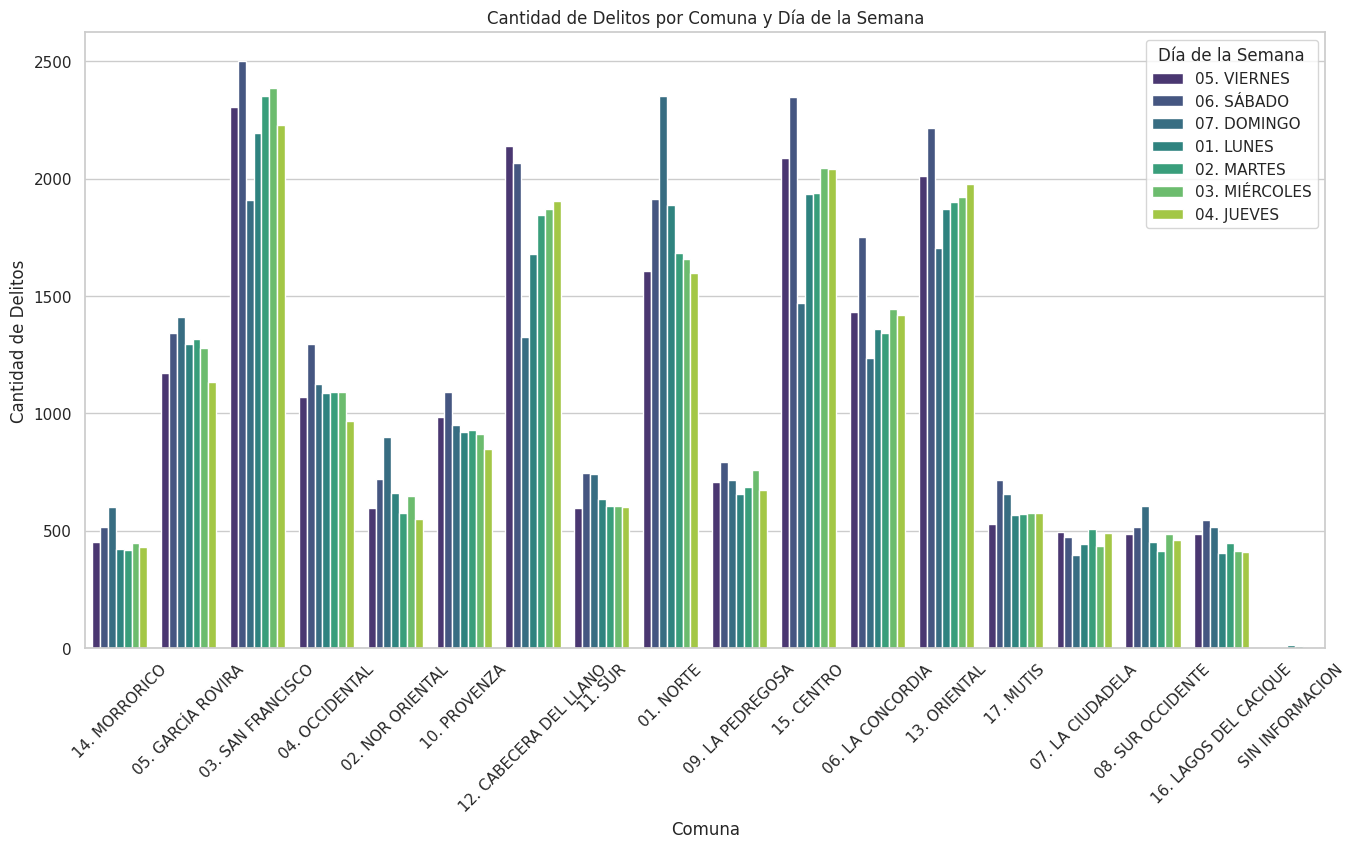

In [ ]:
plt.figure(figsize=(16, 8))
sns.countplot(x='NOM_COMUNA', data=df, hue='DIA_SEMANA', palette='viridis')
plt.title('Cantidad de Delitos por Comuna y Día de la Semana')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Delitos')
plt.xticks(rotation=45)
plt.legend(title='Día de la Semana', loc='upper right')
plt.show()

In [ ]:
comunas = df['NOM_COMUNA'].unique()

for comuna in comunas:

    df_comuna = df[df['NOM_COMUNA'] == comuna]

    plt.figure(figsize=(12, 6))
    sns.countplot(x='DIA_SEMANA', data=df_comuna, hue='BARRIOS_HECHO', palette='viridis')
    plt.title(f'Cantidad de Delitos por Día de la Semana en los Barrios de la Comuna {comuna}')
    plt.xlabel('Día de la Semana')
    plt.ylabel('Cantidad de Delitos')
    plt.xticks(rotation=45)
    plt.legend(title='Barrio', loc='upper right')
    plt.show()

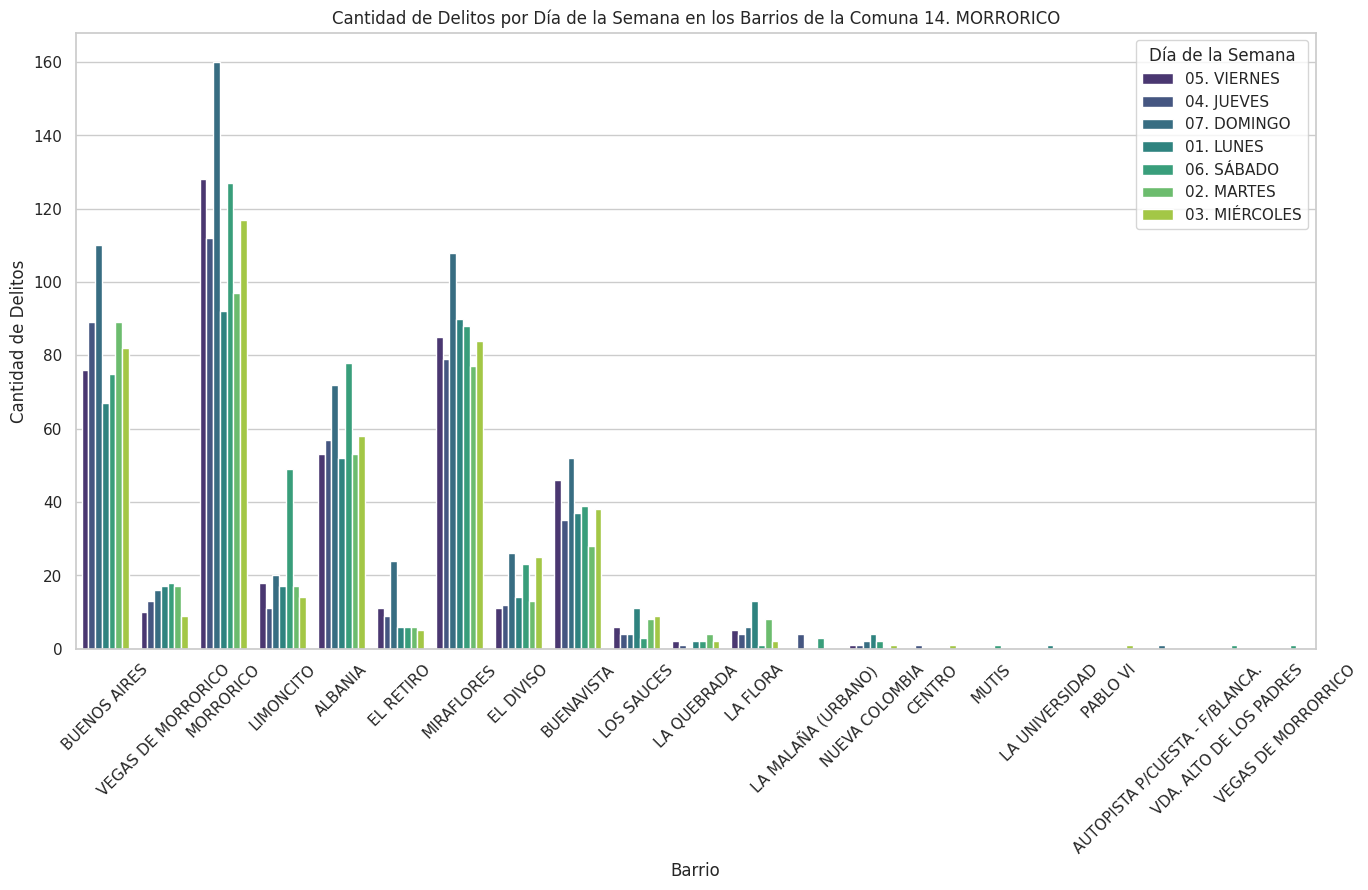

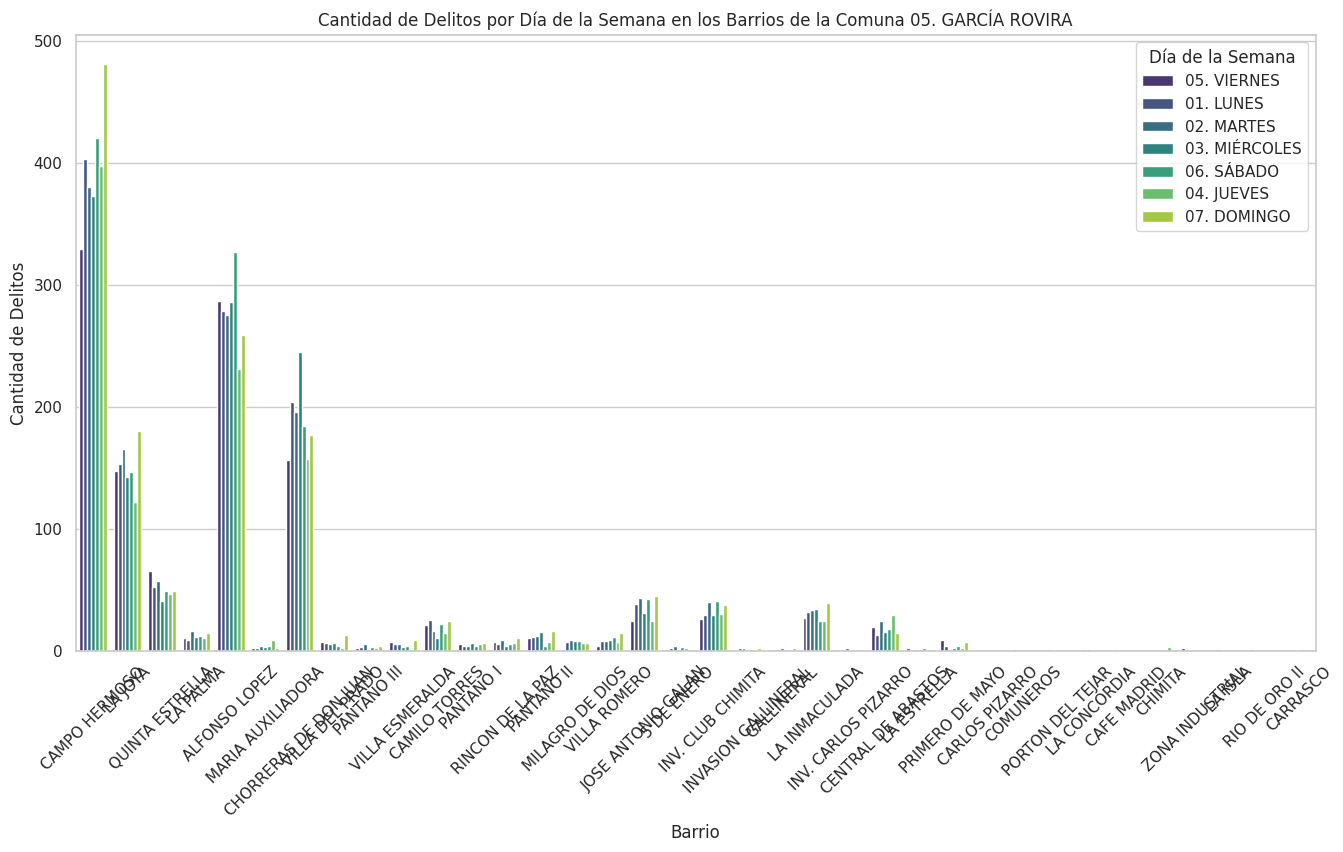

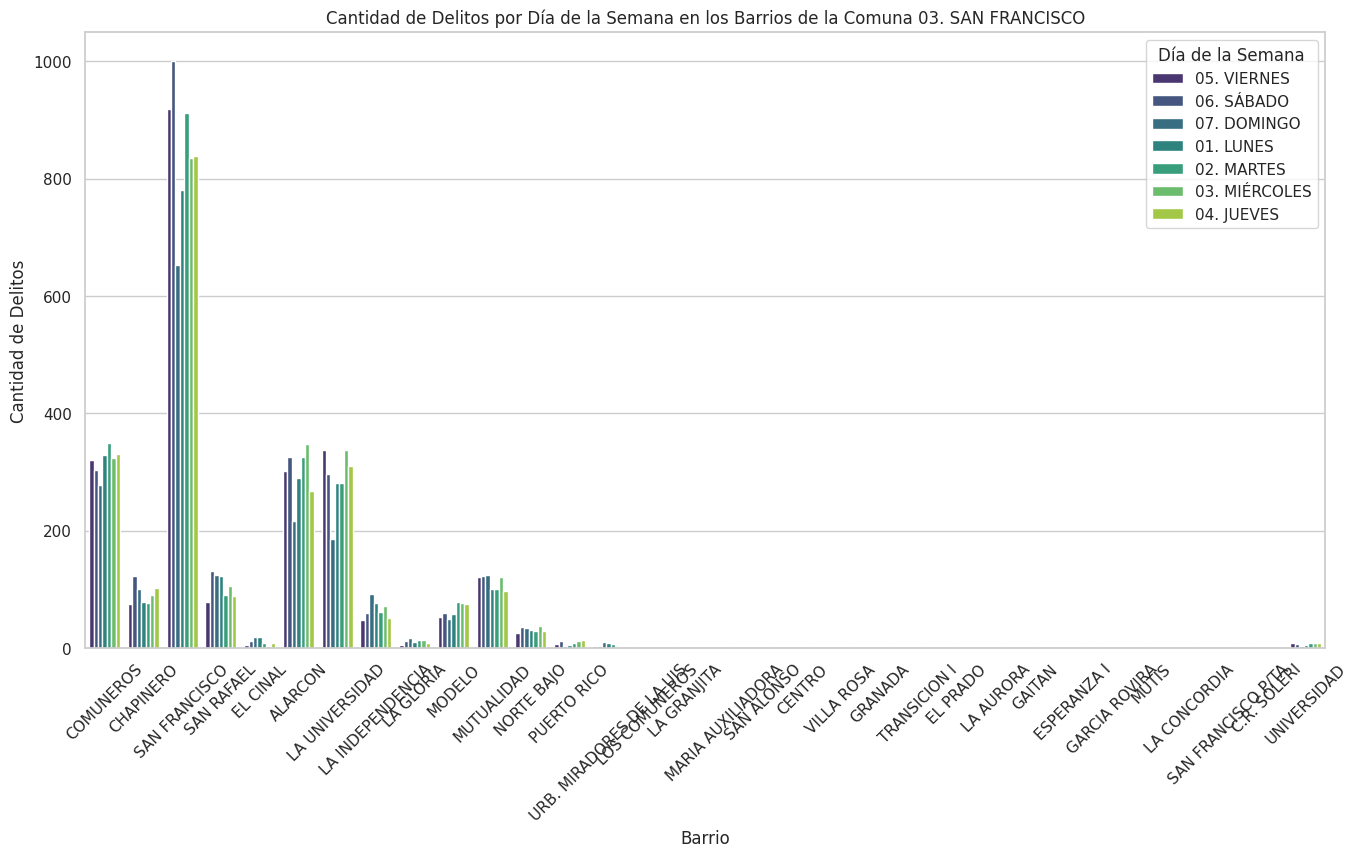

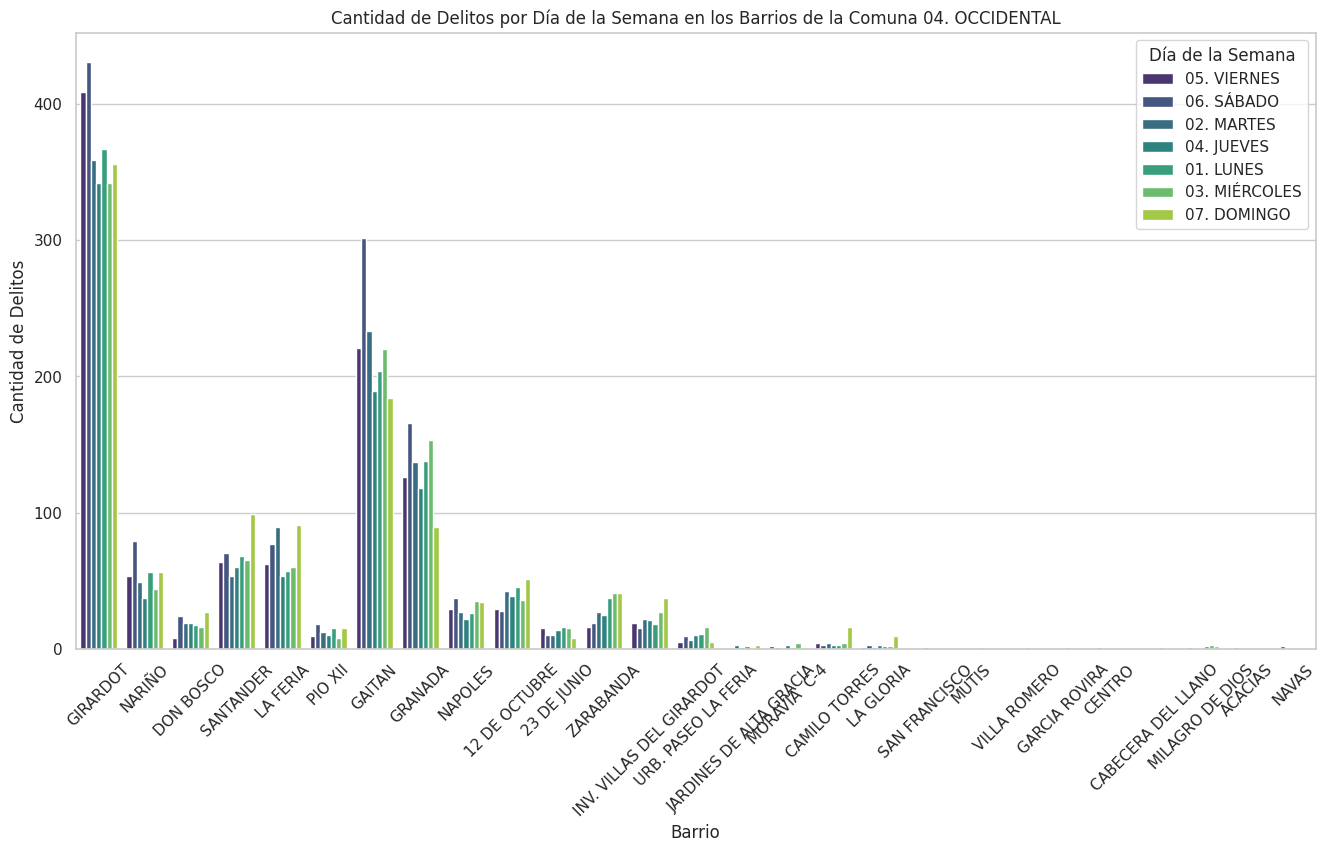

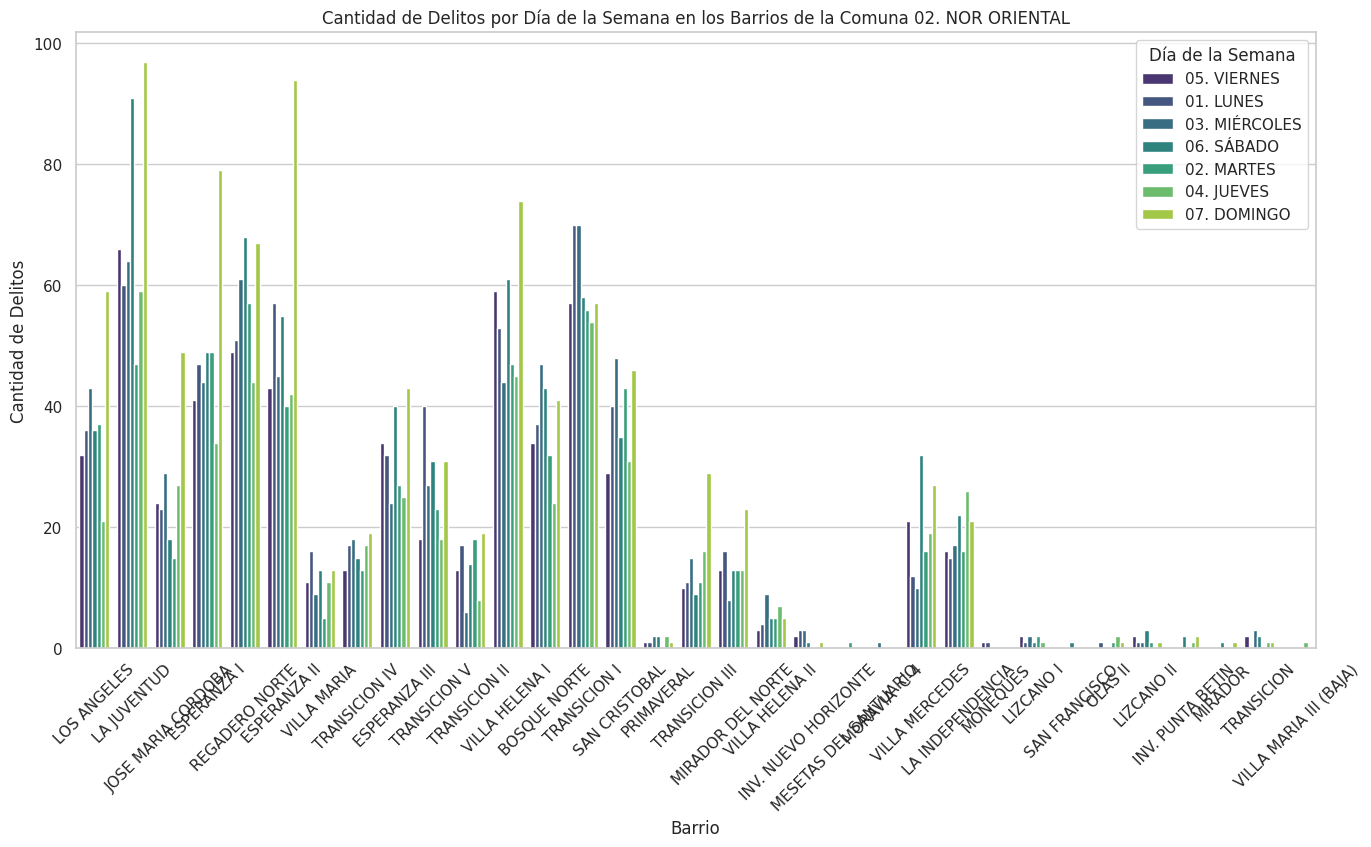

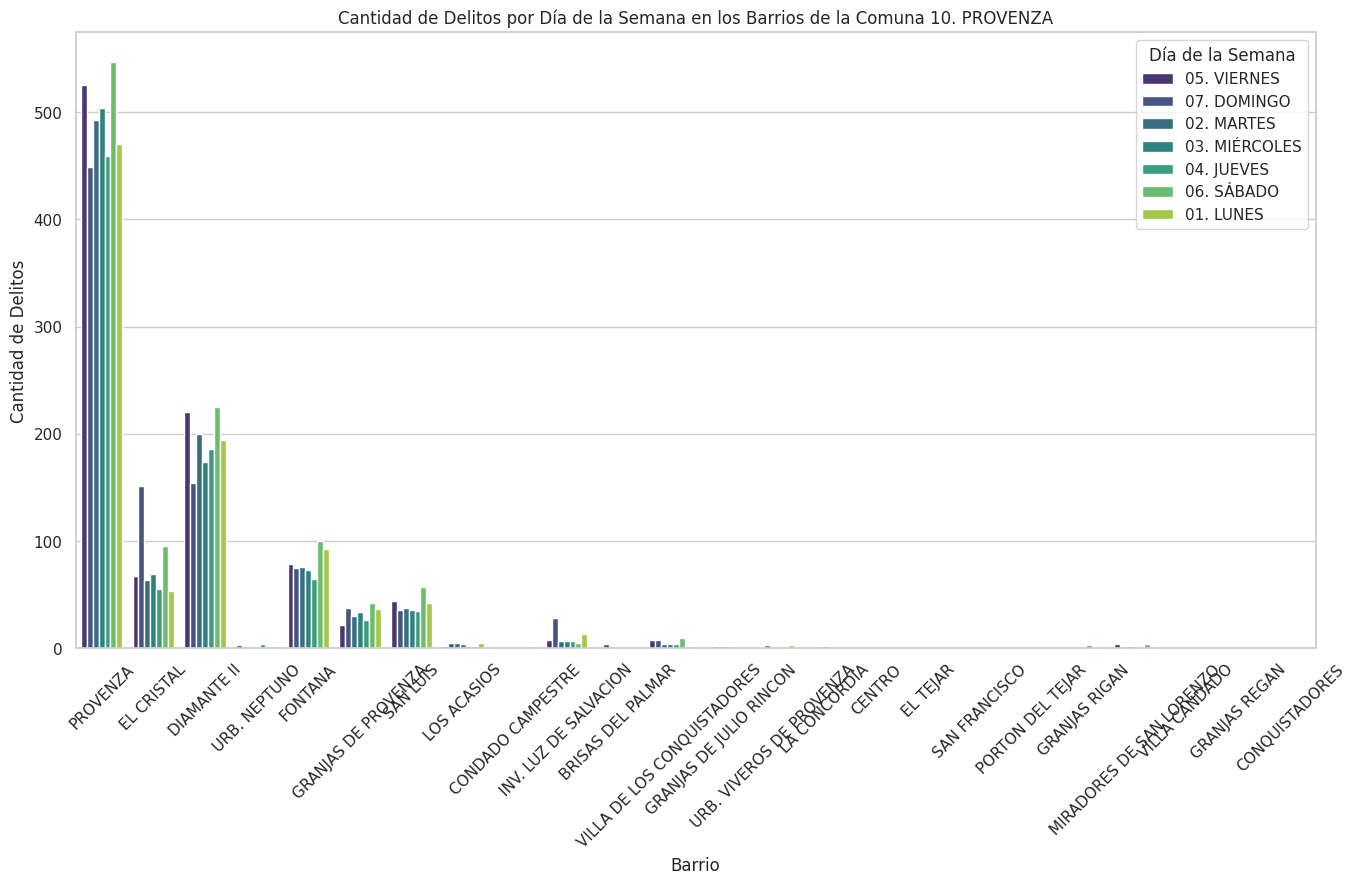

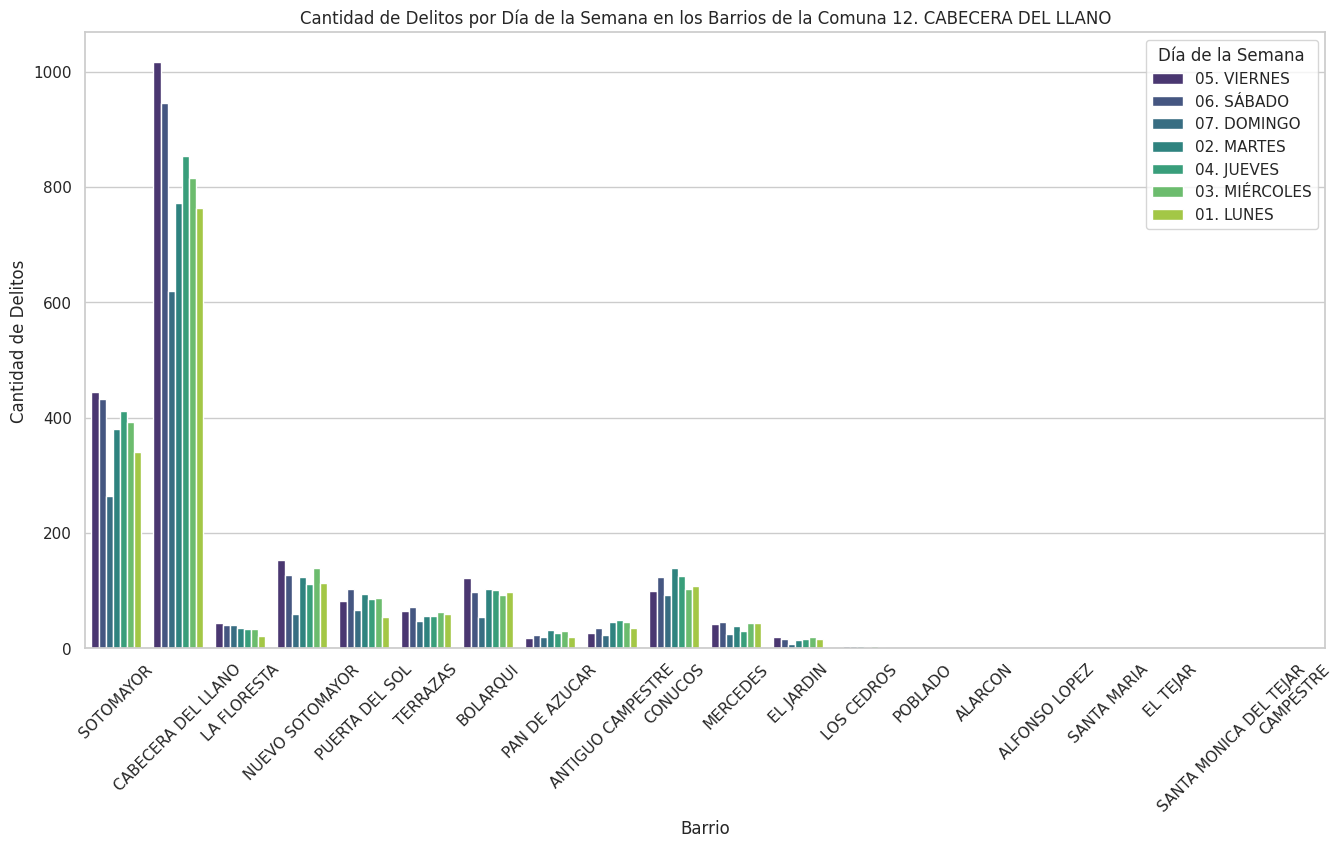

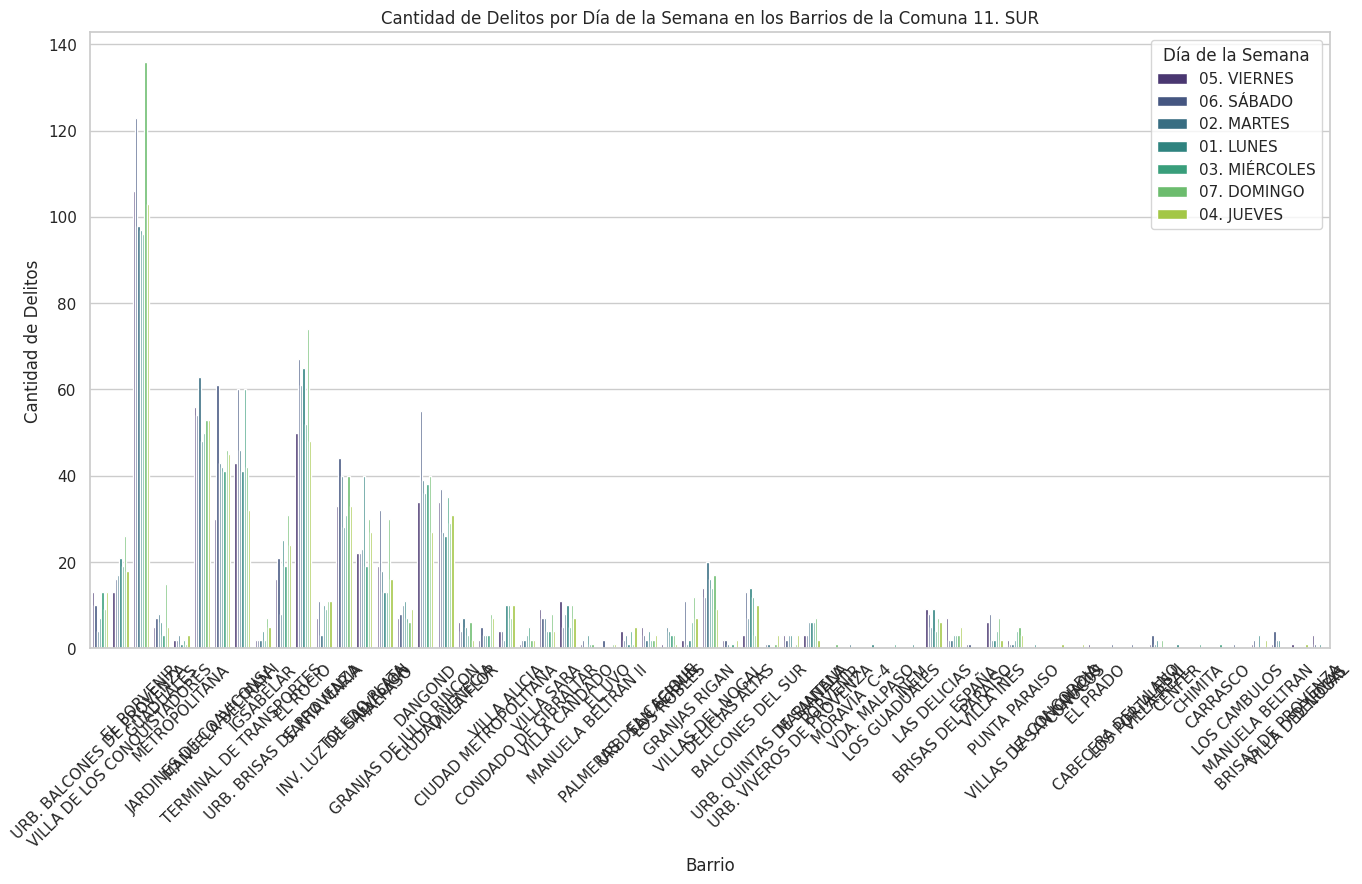

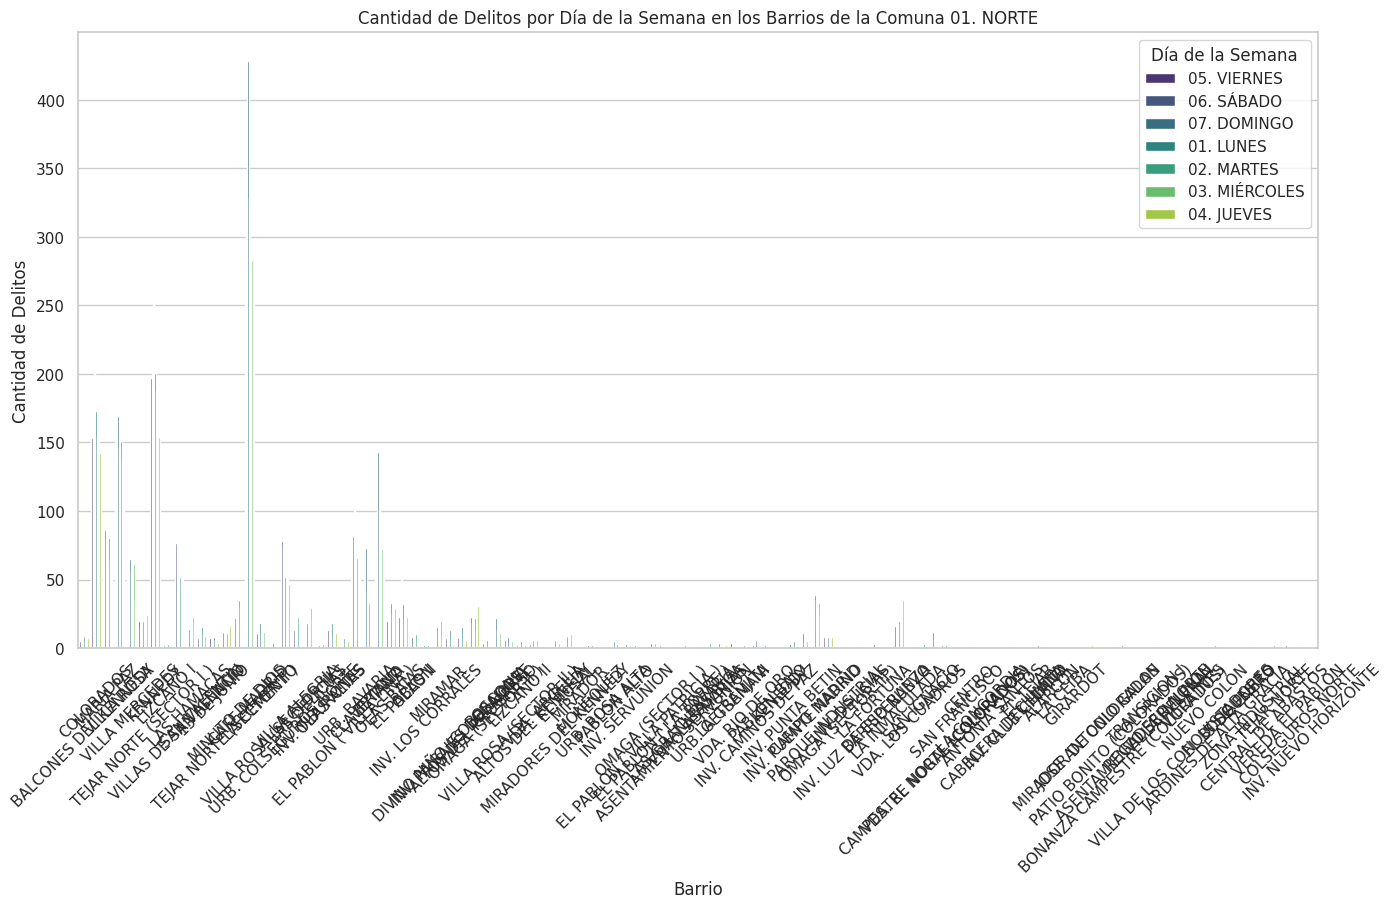

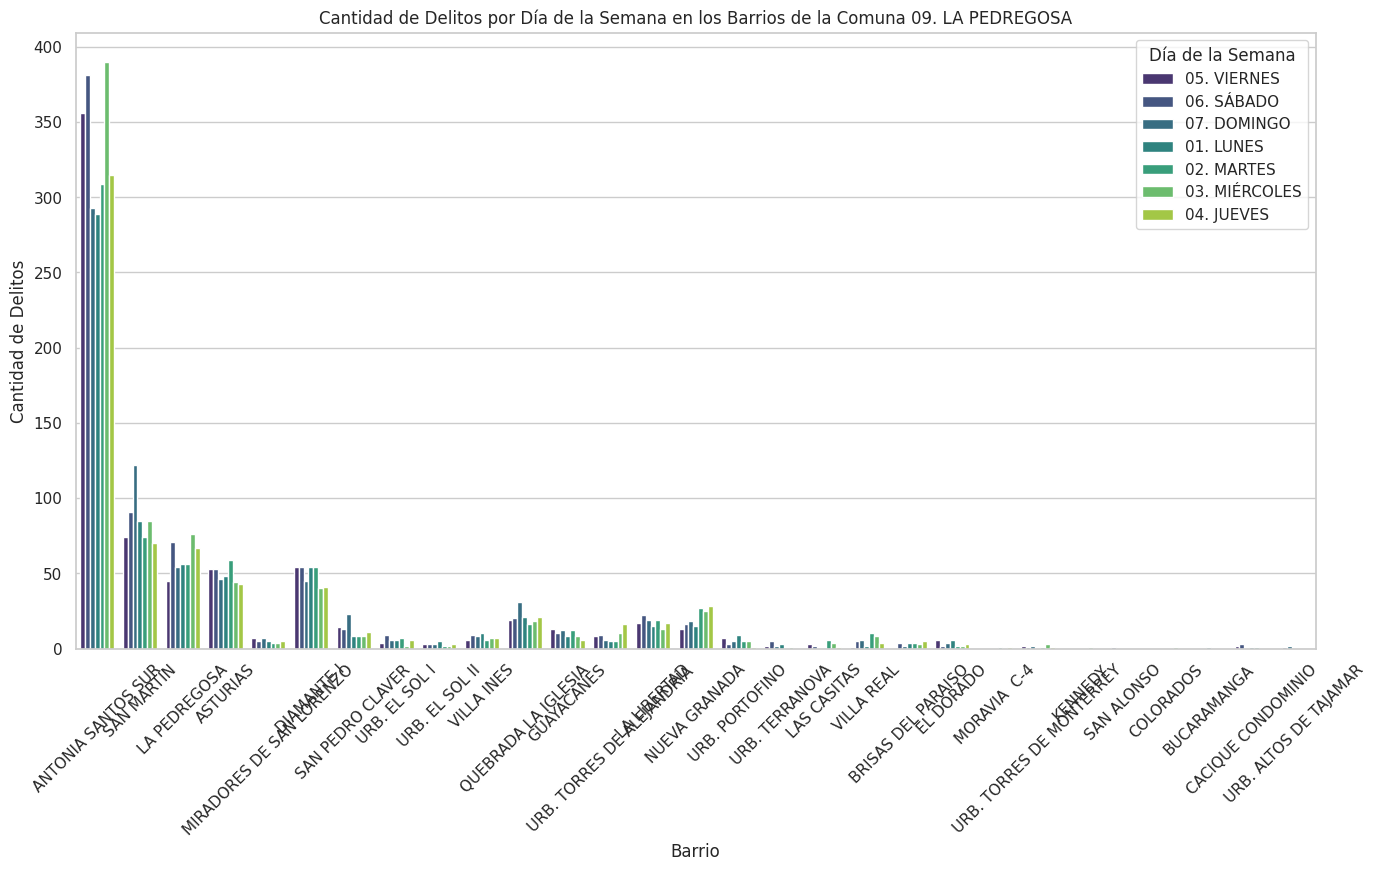

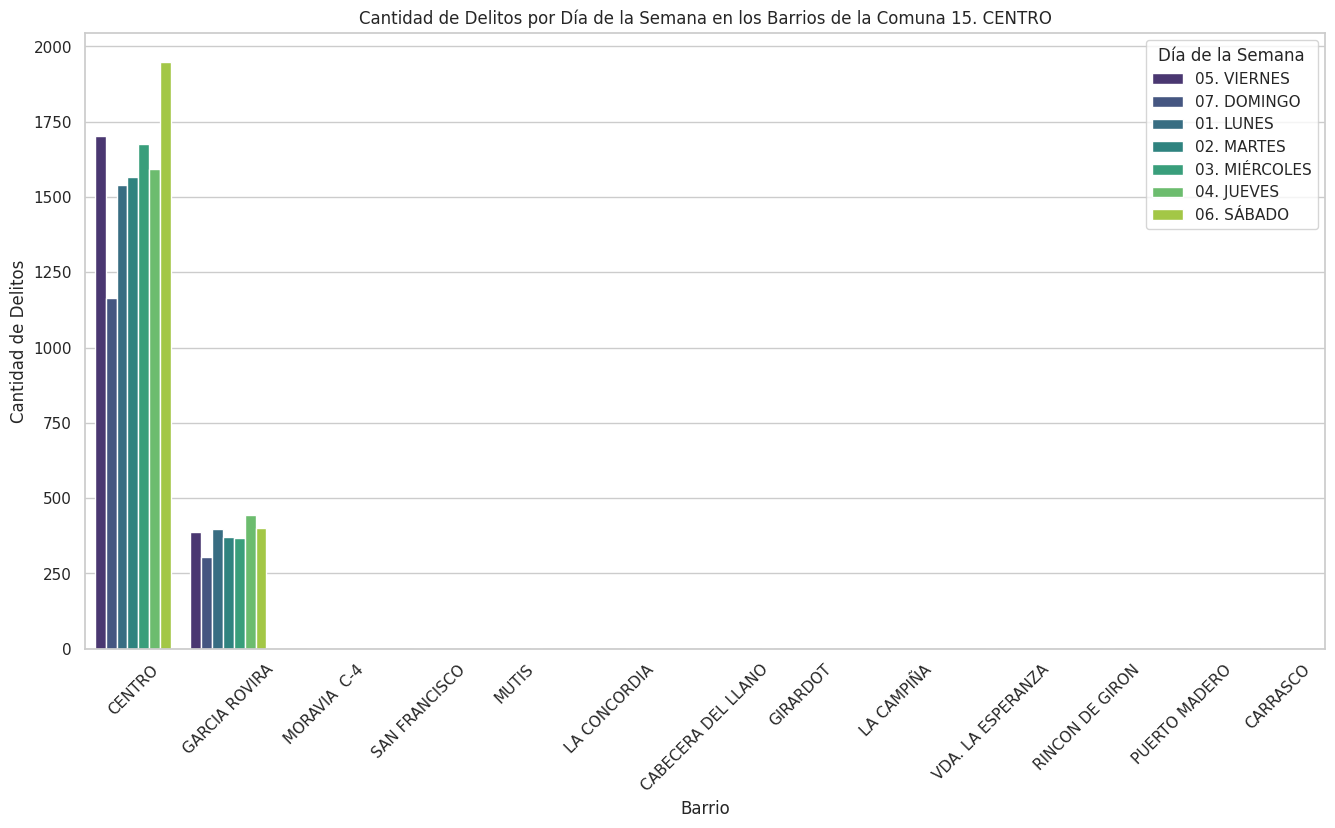

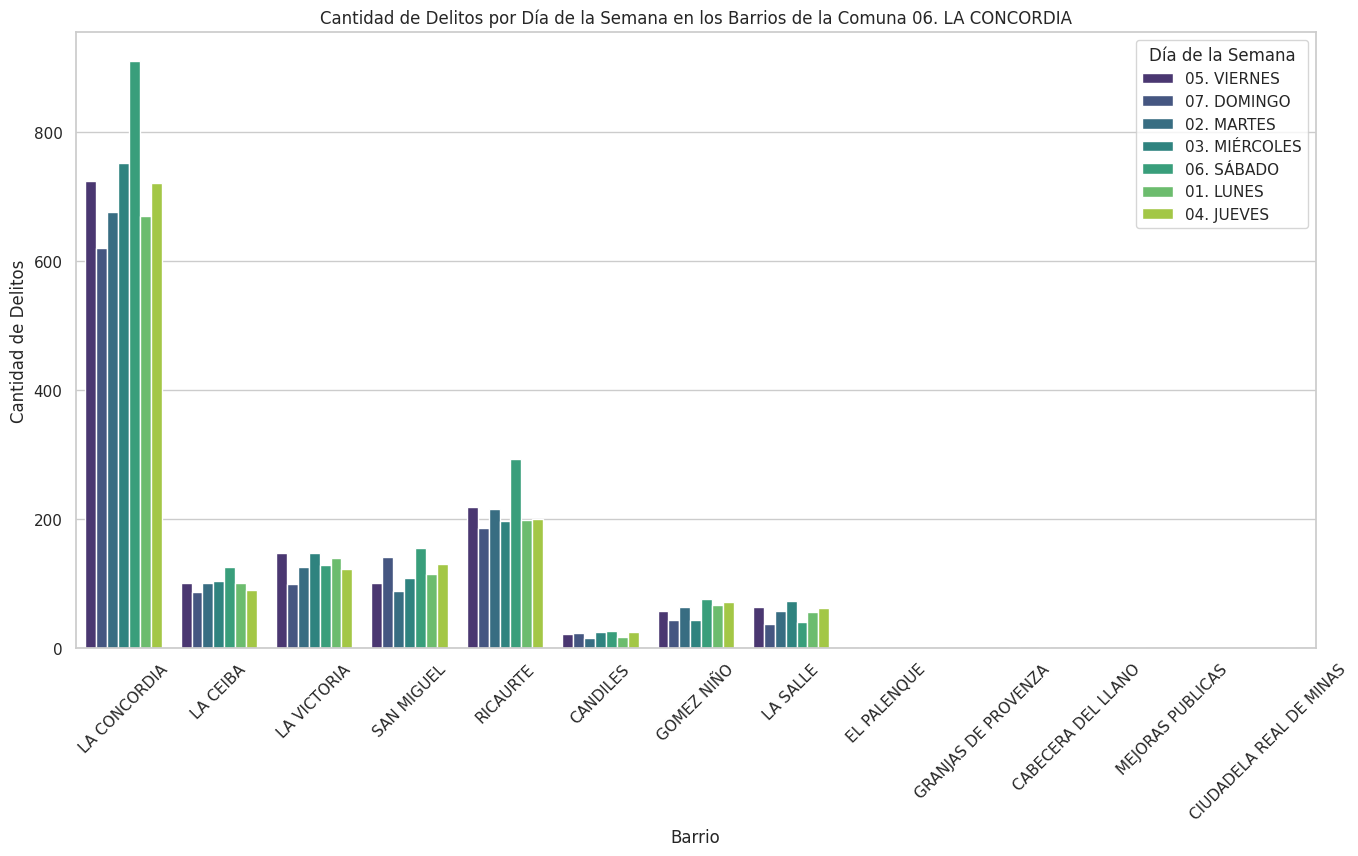

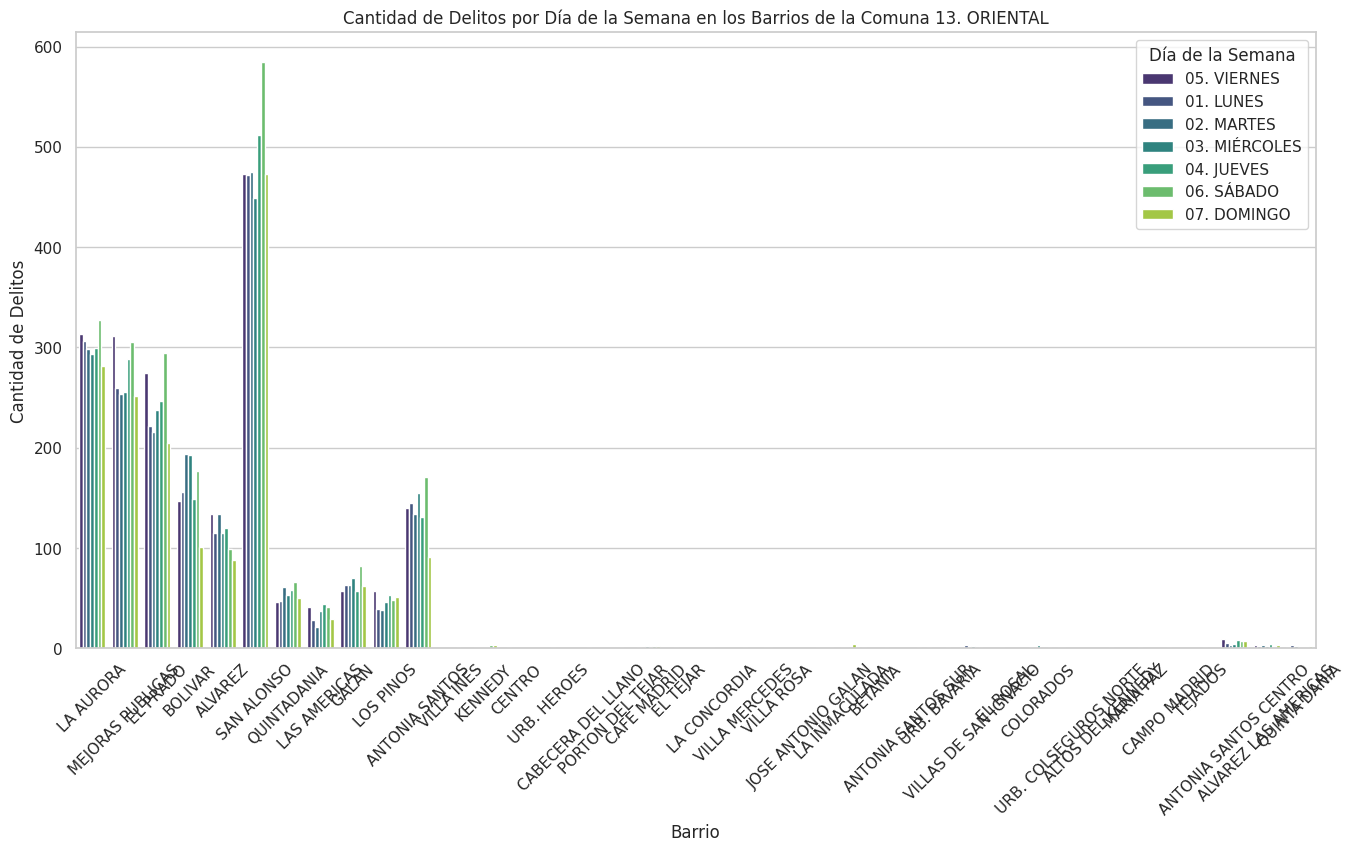

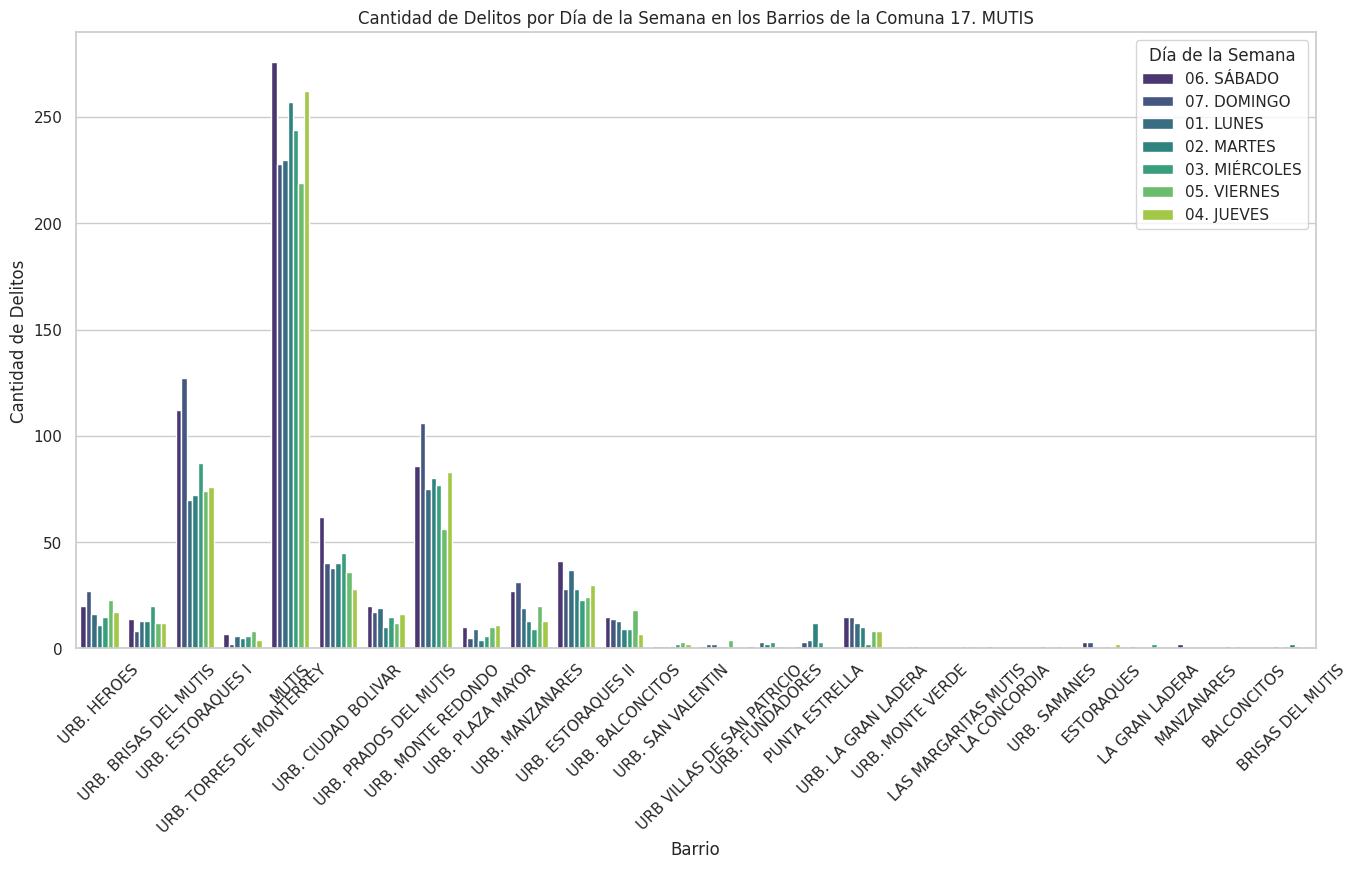

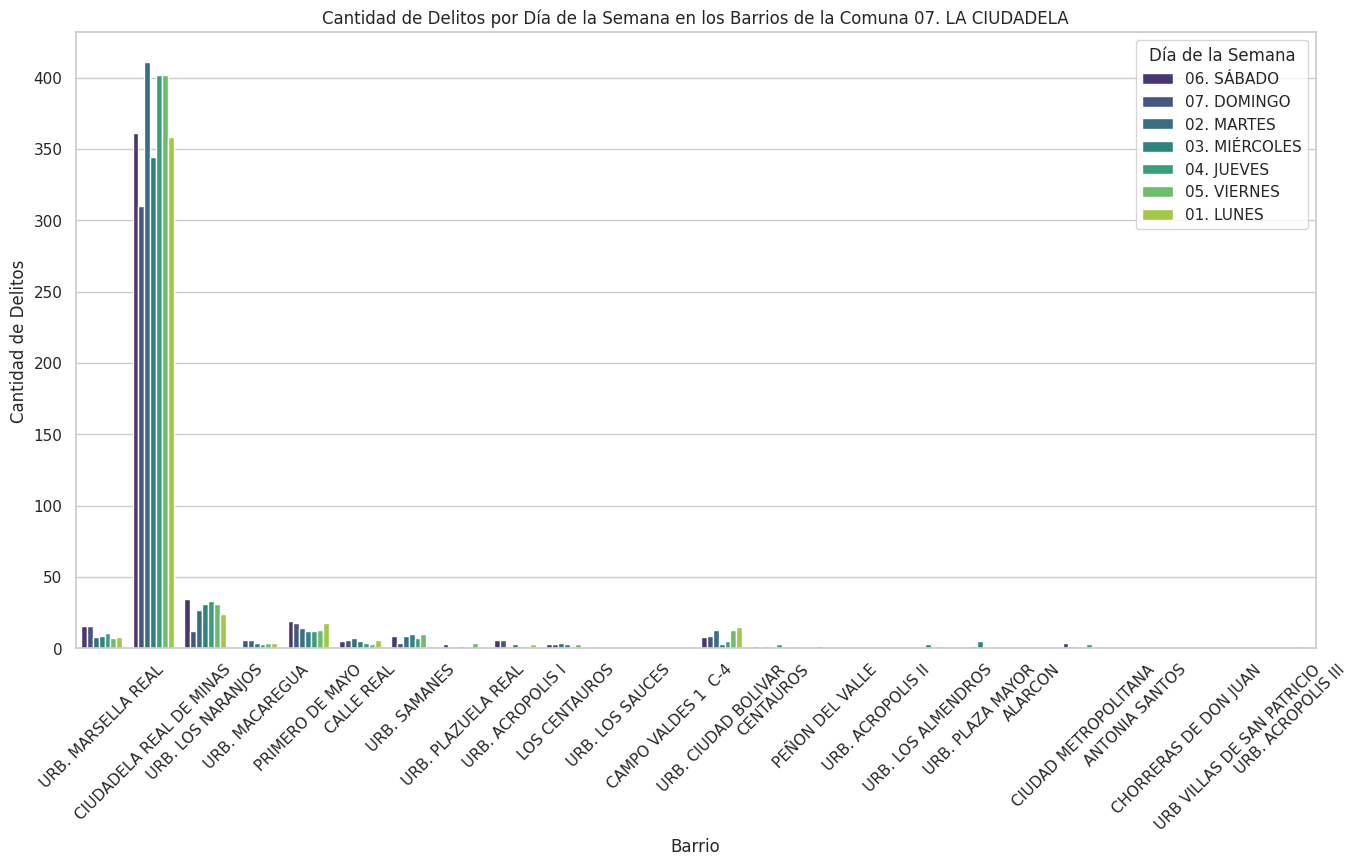

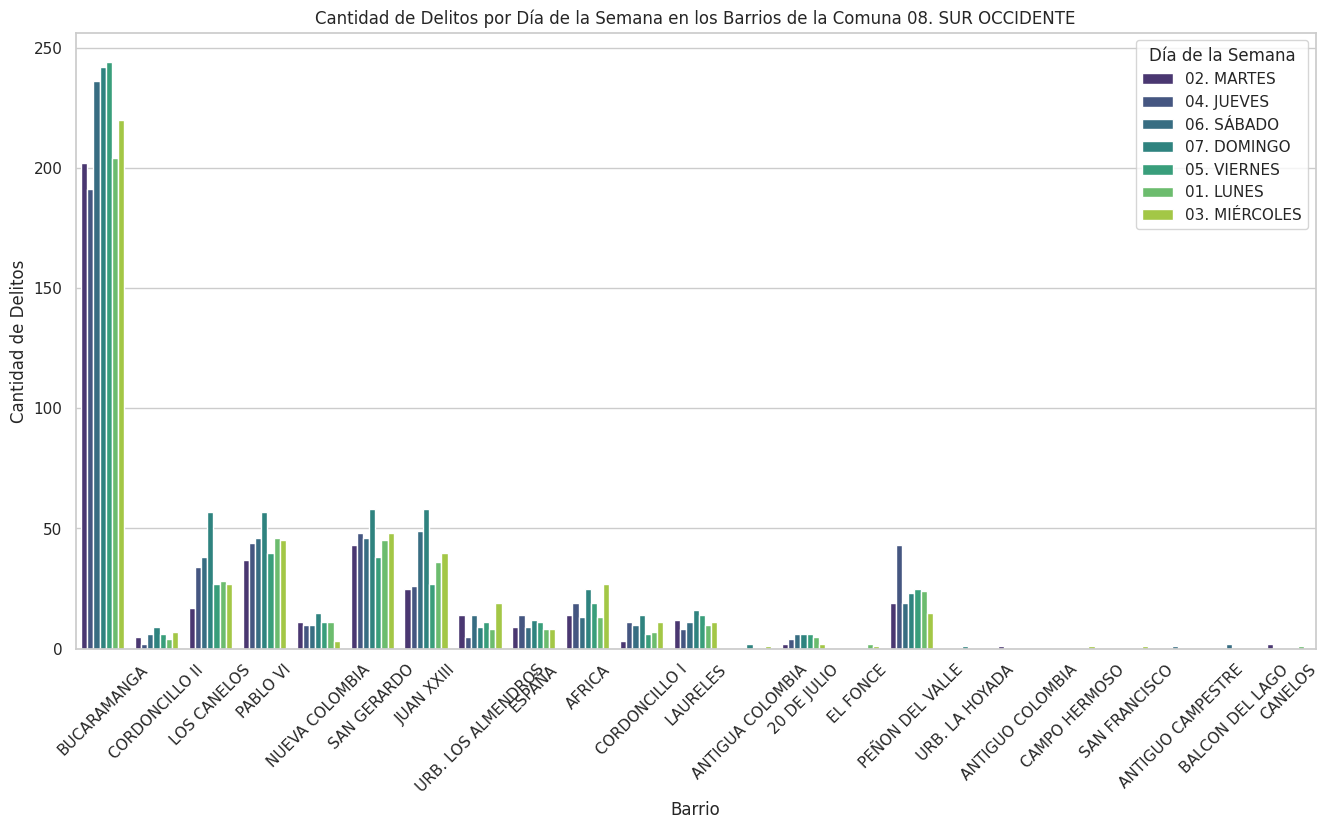

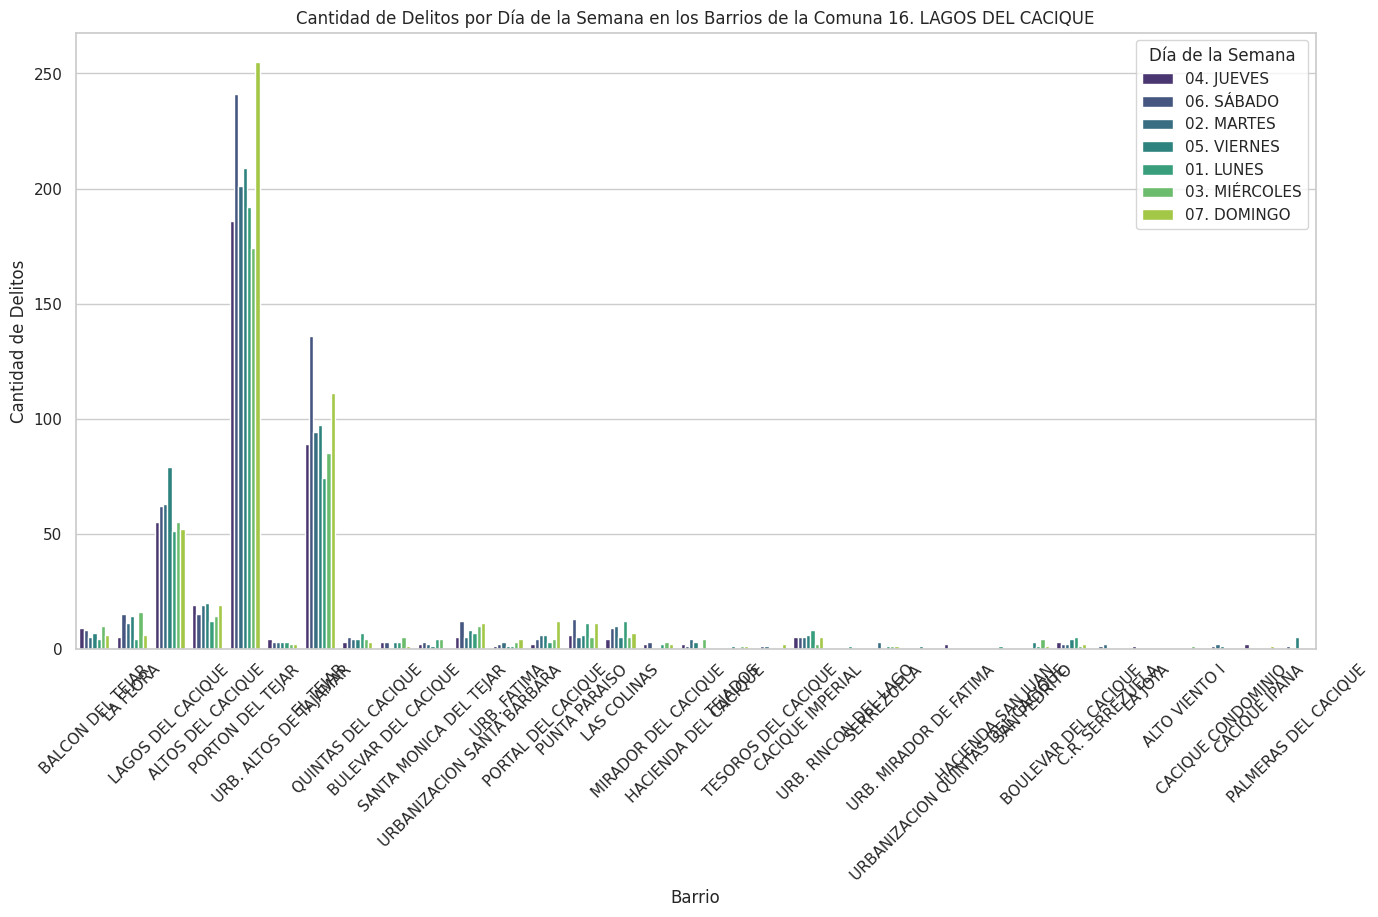

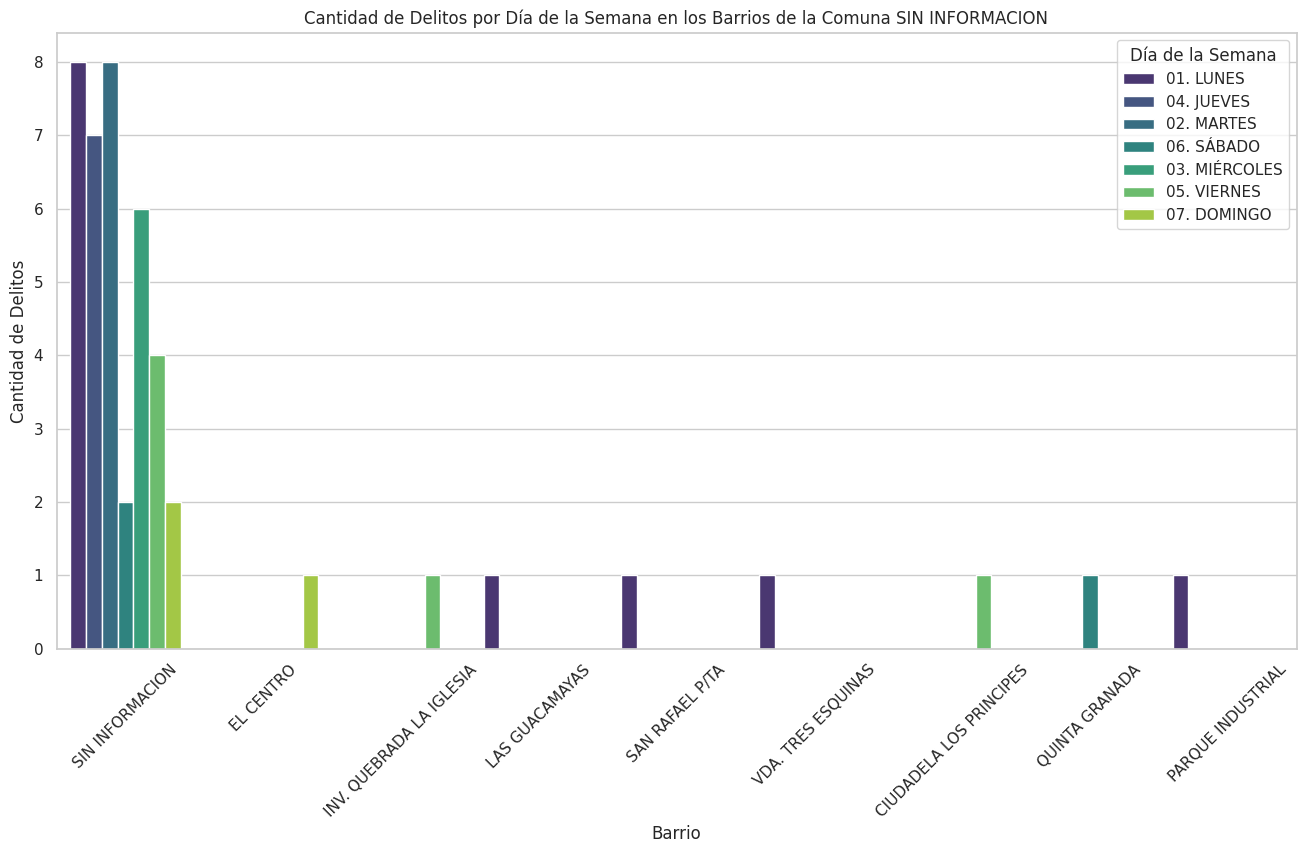

In [ ]:

for comuna in comunas:
    df_comuna = df[df['NOM_COMUNA'] == comuna]

    plt.figure(figsize=(16, 8))
    sns.countplot(x='BARRIOS_HECHO', data=df_comuna, hue='DIA_SEMANA', palette='viridis')
    plt.title(f'Cantidad de Delitos por Día de la Semana en los Barrios de la Comuna {comuna}')
    plt.xlabel('Barrio')
    plt.ylabel('Cantidad de Delitos')
    plt.xticks(rotation=45)
    plt.legend(title='Día de la Semana', loc='upper right')
    plt.show()

In [ ]:
delitos_por_comuna = df.groupby(['NOM_COMUNA', 'CLASIFICACIONES DELITO']).size().unstack(fill_value=0)

delitos_por_comuna['Total'] = delitos_por_comuna.sum(axis=1)

delitos_por_comuna = delitos_por_comuna.sort_values(by='Total', ascending=False)

delitos_por_comuna.drop(columns='Total', inplace=True)

plt.figure(figsize=(18, 8))
for i, col in enumerate(delitos_por_comuna.columns):
    plt.scatter(delitos_por_comuna.index, delitos_por_comuna[col], label=col, alpha=0.7, s=100)
plt.title('Delitos más Comunes por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Cantidad de Delitos')
plt.xticks(rotation=45)
plt.legend(title='Clasificación del Delito', loc='upper right')
plt.show()

In [ ]:
delitos_por_comuna

CLASIFICACIONES DELITO  LESIONES FATALES  LESIONES NO FATALES  NO REPORTA  \
NOM_COMUNA                                                                  
03. SAN FRANCISCO                    255                15235           1   
15. CENTRO                           124                13527           1   
13. ORIENTAL                         100                13267           1   
12. CABECERA DEL LLANO                86                12587           1   
01. NORTE                            386                11689           1   
06. LA CONCORDIA                     122                 9662           0   
05. GARCÍA ROVIRA                    112                 8470           5   
04. OCCIDENTAL                       163                 7304           1   
10. PROVENZA                          70                 6367           0   
09. LA PEDREGOSA                      65                 4779           0   
02. NOR ORIENTAL                     186                 4219           0   
11. SUR                               65                 4251           0   
17. MUTIS                             54                 3967           0   
08. SUR OCCIDENTE                     72                 3187           1   
14. MORRORICO                         99                 3020           0   
07. LA CIUDADELA                      19                 3125           0   
16. LAGOS DEL CACIQUE                  9                 3174           0   
SIN INFORMACION                        1                   43           0   

CLASIFICACIONES DELITO  VIOLENCIA SEXUAL  
NOM_COMUNA                                
03. SAN FRANCISCO                    384  
15. CENTRO                           220  
13. ORIENTAL                         238  
12. CABECERA DEL LLANO               161  
01. NORTE                            632  
06. LA CONCORDIA                     210  
05. GARCÍA ROVIRA                    372  
04. OCCIDENTAL                       268  
10. PROVENZA                         202  
09. LA PEDREGOSA                     150  
02. NOR ORIENTAL                     249  
11. SUR                              216  
17. MUTIS                            175  
08. SUR OCCIDENTE                    159  
14. MORRORICO                        171  
07. LA CIUDADELA                     103  
16. LAGOS DEL CACIQUE                 45  
SIN INFORMACION                        1

<ipython-input-26-c28699422665>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NOM_COMUNA', y='CLASIFICACIONES DELITO', data=df_top_comunas, palette='viridis')


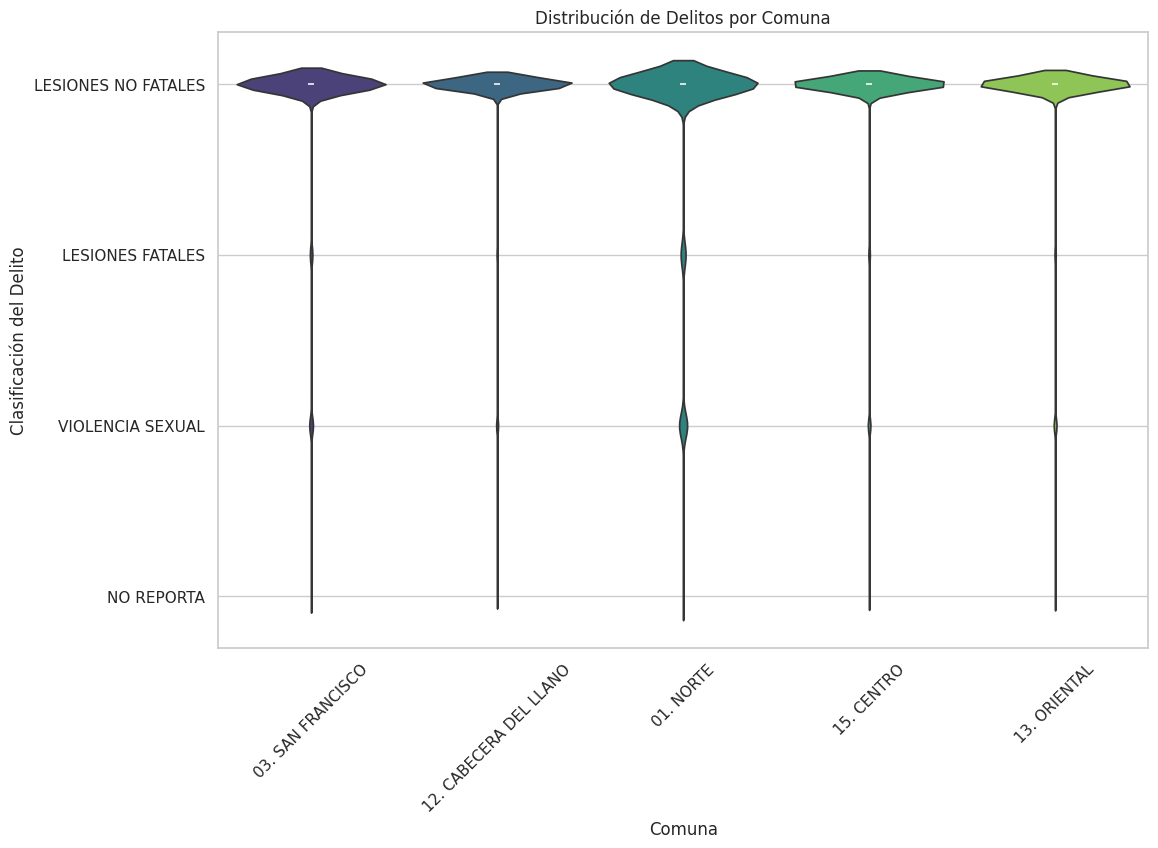

In [ ]:
top_comunas = df['NOM_COMUNA'].value_counts().index[:5]
df_top_comunas = df[df['NOM_COMUNA'].isin(top_comunas)]

plt.figure(figsize=(12, 8))
sns.violinplot(x='NOM_COMUNA', y='CLASIFICACIONES DELITO', data=df_top_comunas, palette='viridis')
plt.title('Distribución de Delitos por Comuna')
plt.xlabel('Comuna')
plt.ylabel('Clasificación del Delito')
plt.xticks(rotation=45)
plt.show()

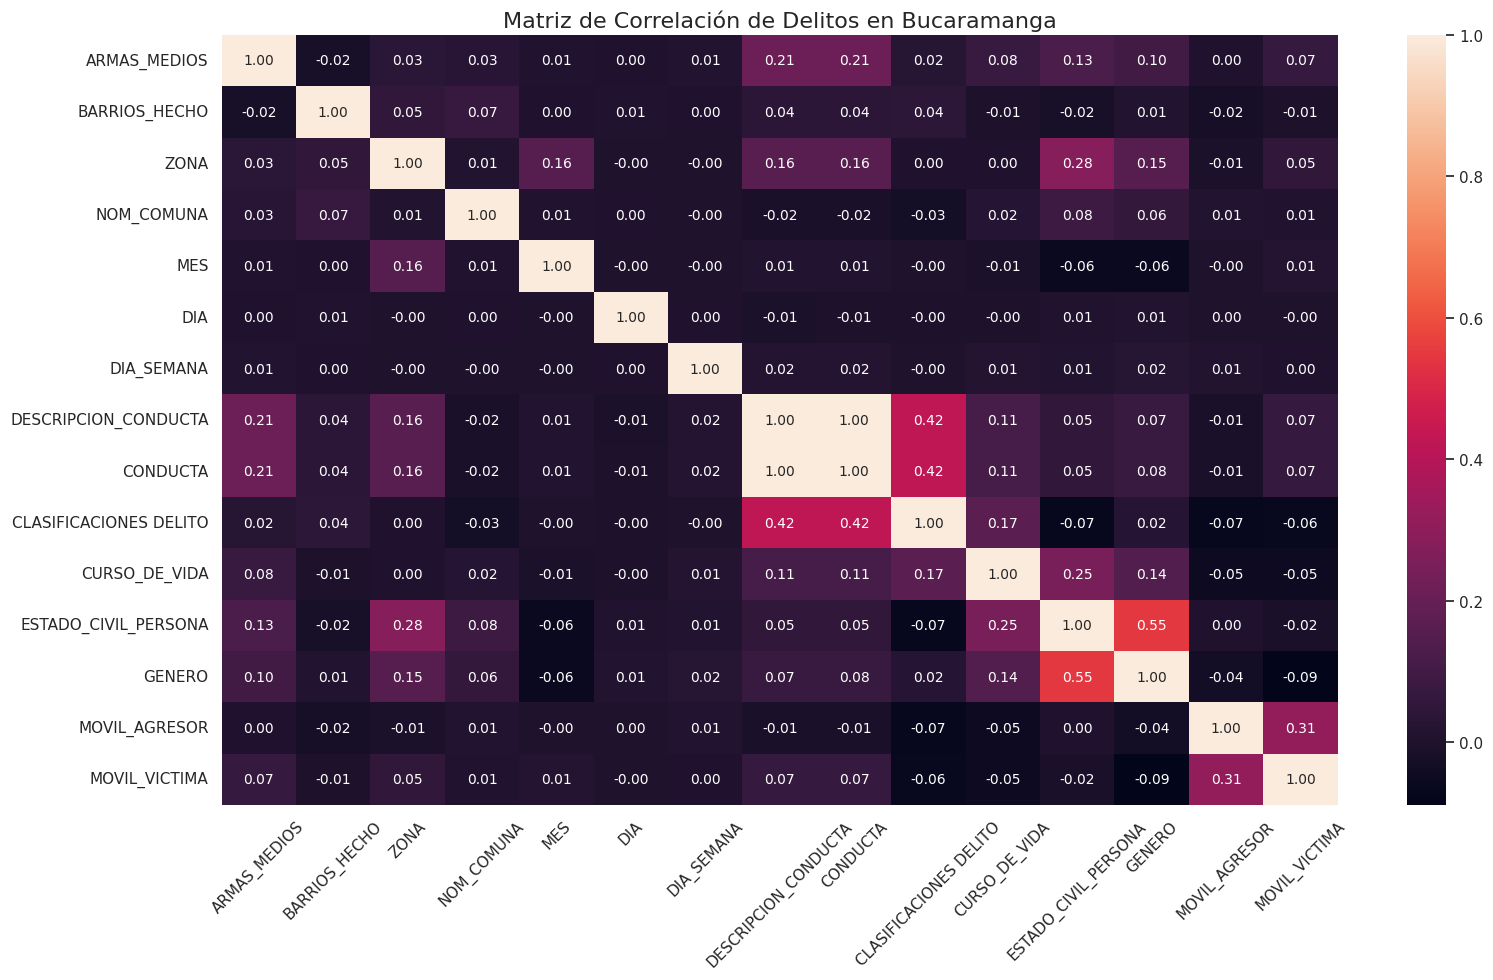

In [ ]:
relevant_columns = ['ARMAS_MEDIOS', 'BARRIOS_HECHO', 'ZONA','NOM_COMUNA', 'MES', 'DIA', 'DIA_SEMANA', 'DESCRIPCION_CONDUCTA',
                   'CONDUCTA', 'CLASIFICACIONES DELITO', 'CURSO_DE_VIDA','ESTADO_CIVIL_PERSONA', 'GENERO', 'MOVIL_AGRESOR', 'MOVIL_VICTIMA']

for column in relevant_columns:
    df[column] = pd.factorize(df[column])[0]

corr_matrix = df[relevant_columns].corr()

plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlación de Delitos en Bucaramanga', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
df['LATITUD'] = pd.to_numeric(df['LATITUD'], errors='coerce')
df['LONGITUD'] = pd.to_numeric(df['LONGITUD'], errors='coerce')

df.dropna(subset=['LATITUD', 'LONGITUD'], inplace=True)

In [ ]:
categorical_cols = ['ARMAS_MEDIOS', 'BARRIOS_HECHO', 'ZONA', 'NOM_COMUNA',
                    'MES', 'DIA_SEMANA', 'DESCRIPCION_CONDUCTA', 'CONDUCTA',
                    'CLASIFICACIONES DELITO', 'CURSO_DE_VIDA', 'ESTADO_CIVIL_PERSONA',
                    'GENERO', 'MOVIL_AGRESOR', 'MOVIL_VICTIMA']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

y = df_encoded['ORDEN']

X = df_encoded.drop(columns=['ORDEN'])

#🤖**Evaluación de modelos**⚙️

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 16682.06816891157
R-squared: 0.9995921509134172


In [ ]:
coef = pd.Series(model.coef_, index=X.columns)

coef_abs = coef.abs().sort_values(ascending=False)

print(coef_abs.head(10))

ANO                               12473.264162
MES_12. DICIEMBRE                  5880.888327
MES_08. AGOSTO                     2193.835780
MES_07. JULIO                      1537.939710
MES_06. JUNIO                       936.419604
MES_05. MAYO                        357.011799
BARRIOS_HECHO_BALCON DEL TEJAR      275.241004
ARMAS_MEDIOS_DIRECTA                258.289795
BARRIOS_HECHO_URB. FATIMA           244.926402
BARRIOS_HECHO_OLAS II               233.874000
dtype: float64


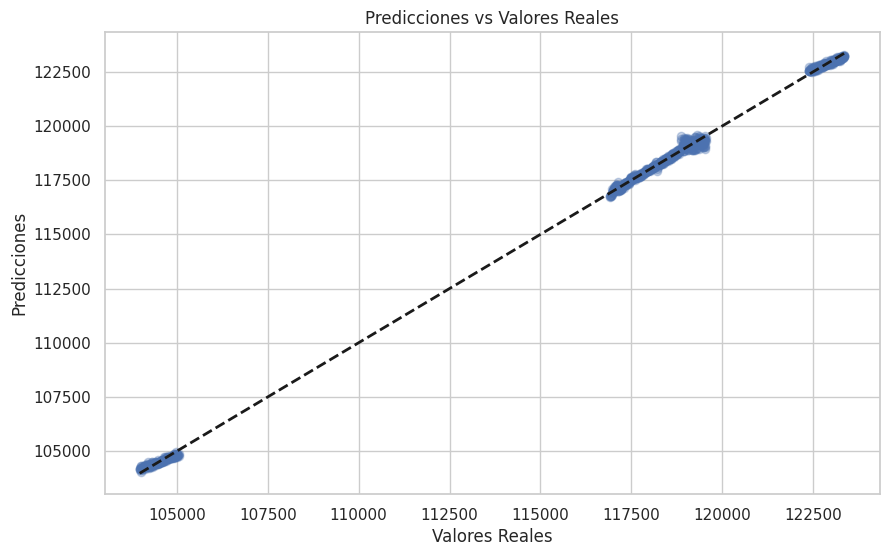

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

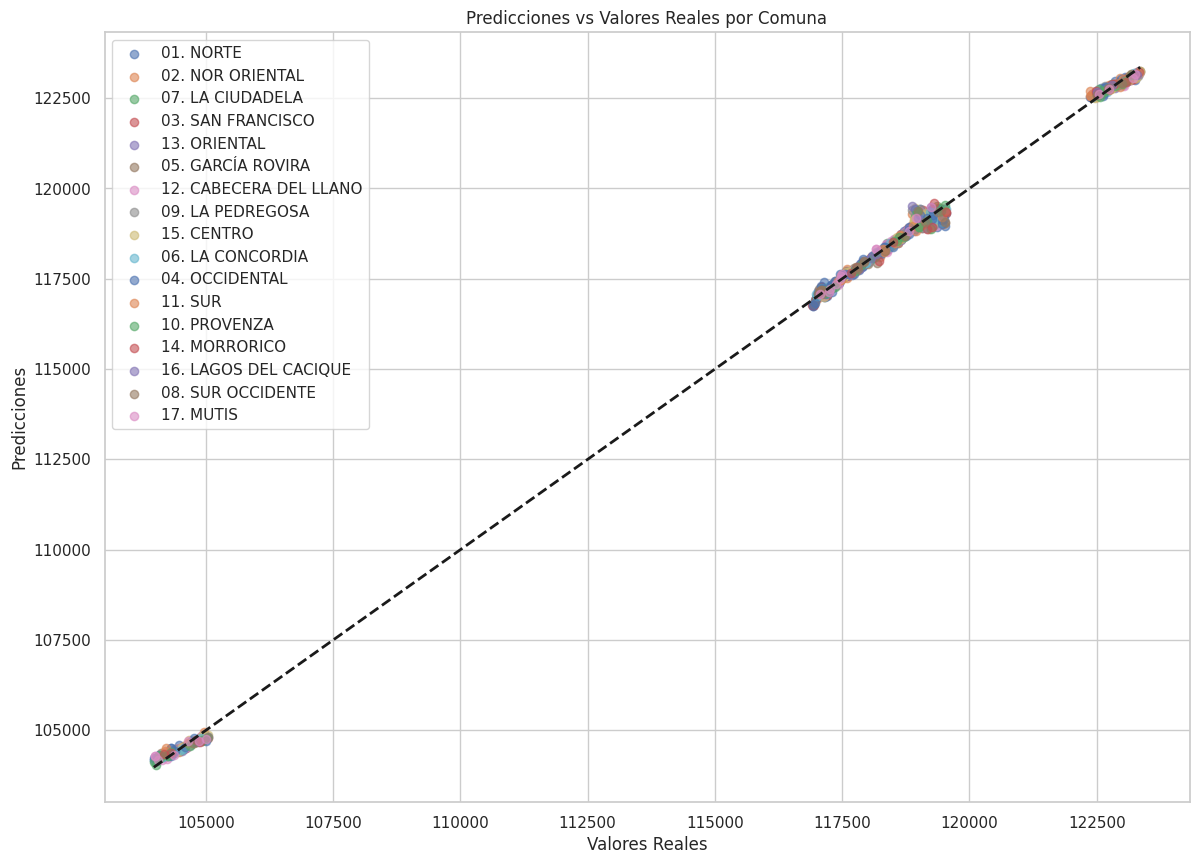

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'NOM_COMUNA': df.loc[X_test.index, 'NOM_COMUNA']})
comunas = results['NOM_COMUNA'].unique()

plt.figure(figsize=(14, 10))

for comuna in comunas:
    data_comuna = results[results['NOM_COMUNA'] == comuna]
    plt.scatter(data_comuna['y_test'], data_comuna['y_pred'], alpha=0.6, label=comuna)

plt.plot([results['y_test'].min(), results['y_test'].max()], [results['y_test'].min(), results['y_test'].max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales por Comuna')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

results = pd.DataFrame({'NOM_COMUNA': df.loc[X_test.index, 'NOM_COMUNA'],
                        'y_test': y_test,
                        'y_pred': y_pred})
print("Resultados por Comuna:")
results

Resultados por Comuna:


NOM_COMUNA  y_test         y_pred
104159          01. NORTE  104160  104302.716143
122829   02. NOR ORIENTAL  122827  122805.794796
117000   07. LA CIUDADELA  116998  116988.847357
117099  03. SAN FRANCISCO  117096  117282.360933
104842       13. ORIENTAL  104842  104673.521064
...                   ...     ...            ...
118173  03. SAN FRANCISCO  118174  118199.778432
118927   07. LA CIUDADELA  118926  119244.430073
123062          01. NORTE  123059  123081.947341
123075     04. OCCIDENTAL  123072  123002.290540
123146  05. GARCÍA ROVIRA  123143  123060.292656

[897 rows x 3 columns]

**Nota:**  Los modelos de regresión lineal en sklearn no tienen un atributo feature_importances_. Este atributo generalmente está disponible en modelos basados en árboles, como RandomForest o GradientBoosting. Por lo que para analizar los coeficientes de un modelo de regresión lineal, pueden interpretarse como la importancia de las características

In [ ]:
feature_importances = model.coef_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10))

                                     Feature    Importance
2                                        ANO  12473.264162
300                        MES_12. DICIEMBRE   5880.888327
299                           MES_08. AGOSTO   2193.835780
298                            MES_07. JULIO   1537.939710
297                            MES_06. JUNIO    936.419604
296                             MES_05. MAYO    357.011799
34            BARRIOS_HECHO_BALCON DEL TEJAR    275.241004
7                       ARMAS_MEDIOS_DIRECTA    258.289795
186                    BARRIOS_HECHO_OLAS II    233.874000
256  BARRIOS_HECHO_VDA. EL NOGAL (COLORADOS)    213.836040


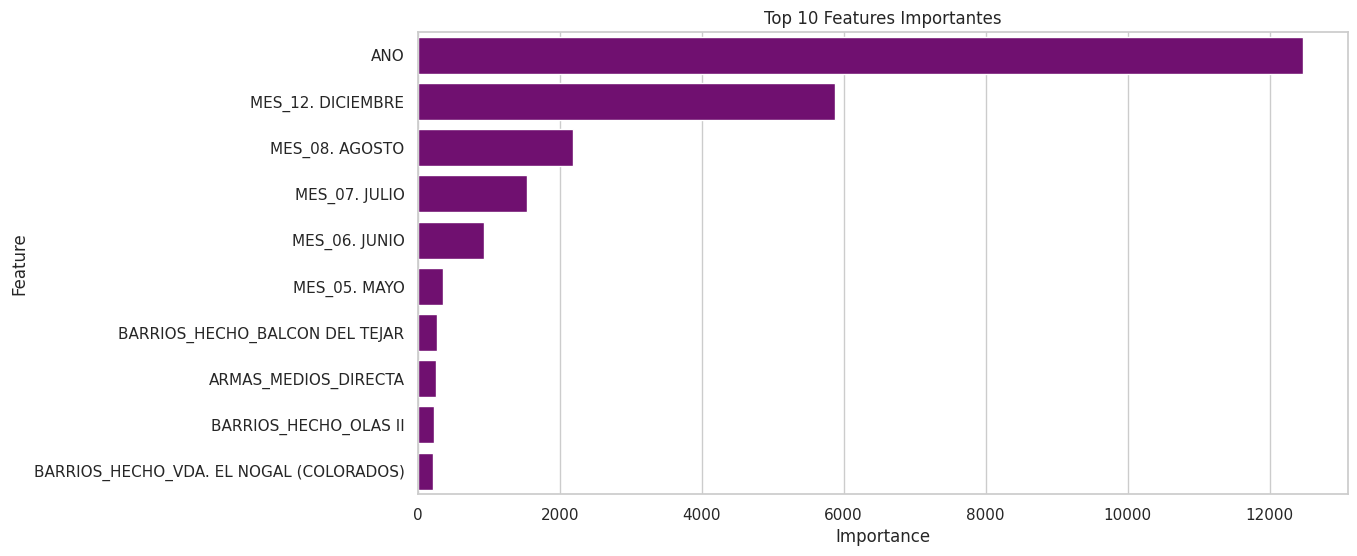

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), color='purple')
plt.title('Top 10 Features Importantes')
plt.show()

## **ANÁLISIS:**
El modelo de regresión lineal demostró ser altamente efectivo con un $R^2$
muy cercano a 1, indicando que casi todas las variaciones en los datos pueden explicarse por el modelo.

*  MSE: 16682.068
*  $R^2$: 0.999952

Las comunas con las mayores predicciones son:

*   Comuna 1: Norte
*   Comuna 2: Nor Oriental
*   Comuna 7: La Ciudadela
*   Comuna 5: García Rovira

A partir de los coeficientes más altos en el modelo, los meses que mayor inciincidencia de delitos tienen son:

1. Diciembre (Mes 12)
2. Agosto (Mes 08)
3. Julio (Mes 07)
4. Junio (Mes 06)
5. Mayo (Mes 05)

Las variables relacionadas con el tiempo, como el año y los meses específicos, y el componente espacial, juegan un papel crucial en las predicciones ya que destacan como las más influyentes.

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=21)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=21)

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1370.6562227991678
R-squared: 0.9999664897132162


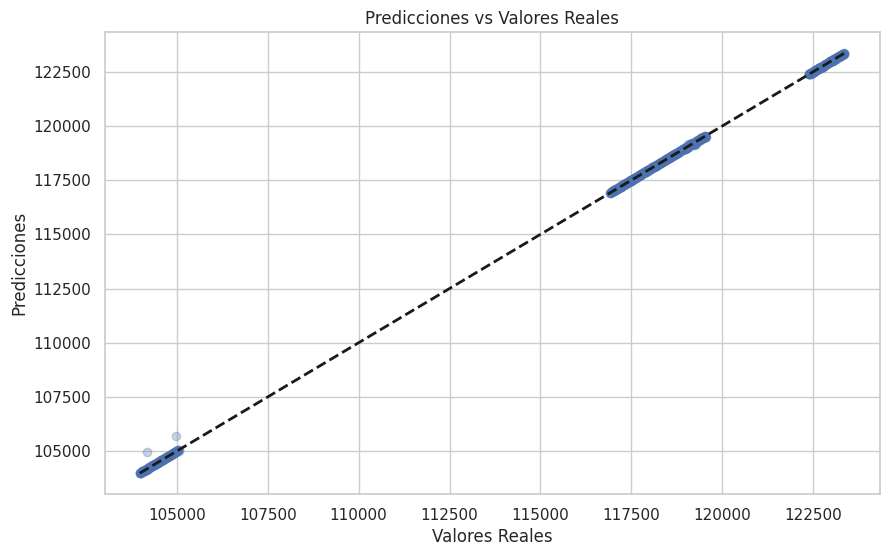

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

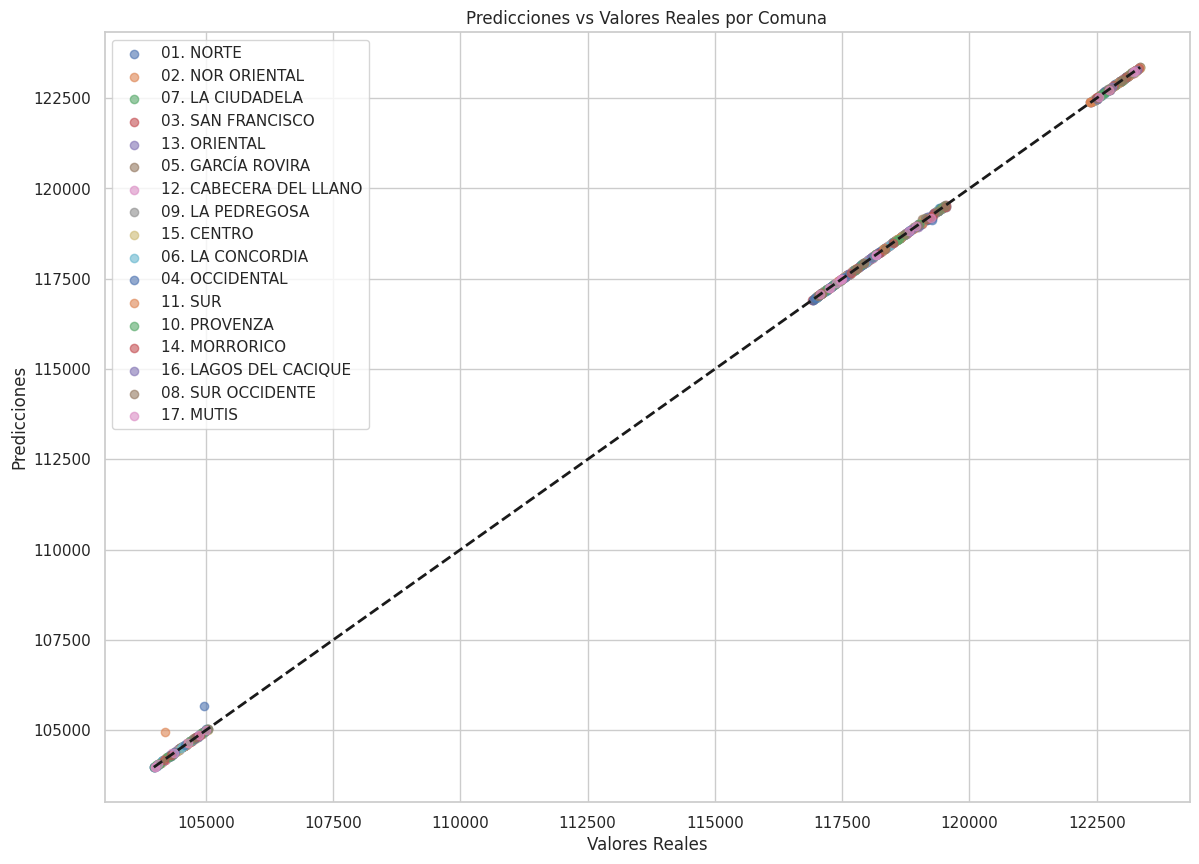

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=21)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'NOM_COMUNA': df.loc[X_test.index, 'NOM_COMUNA']})
comunas = results['NOM_COMUNA'].unique()

plt.figure(figsize=(14, 10))

for comuna in comunas:
    data_comuna = results[results['NOM_COMUNA'] == comuna]
    plt.scatter(data_comuna['y_test'], data_comuna['y_pred'], alpha=0.6, label=comuna)

plt.plot([results['y_test'].min(), results['y_test'].max()], [results['y_test'].min(), results['y_test'].max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales por Comuna')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=21)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

results = pd.DataFrame({'NOM_COMUNA': df.loc[X_test.index, 'NOM_COMUNA'],
                        'y_test': y_test,
                        'y_pred': y_pred})
print("Resultados por Comuna:")
results

Resultados por Comuna:


NOM_COMUNA  y_test         y_pred
104159          01. NORTE  104160  104189.090000
122829   02. NOR ORIENTAL  122827  122830.490000
117000   07. LA CIUDADELA  116998  116994.676667
117099  03. SAN FRANCISCO  117096  117098.570000
104842       13. ORIENTAL  104842  104821.000000
...                   ...     ...            ...
118173  03. SAN FRANCISCO  118174  118171.580000
118927   07. LA CIUDADELA  118926  118938.320000
123062          01. NORTE  123059  123048.310000
123075     04. OCCIDENTAL  123072  123085.730000
123146  05. GARCÍA ROVIRA  123143  123144.900000

[897 rows x 3 columns]

In [ ]:
feature_importances = model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10))

                      Feature  Importance
1                    LONGITUD    0.341738
0                     LATITUD    0.332496
2                         ANO    0.280919
300         MES_12. DICIEMBRE    0.035297
299            MES_08. AGOSTO    0.004954
298             MES_07. JULIO    0.002296
3                         DIA    0.001212
297             MES_06. JUNIO    0.000453
339  CURSO_DE_VIDA_NO REPORTA    0.000374
296              MES_05. MAYO    0.000112


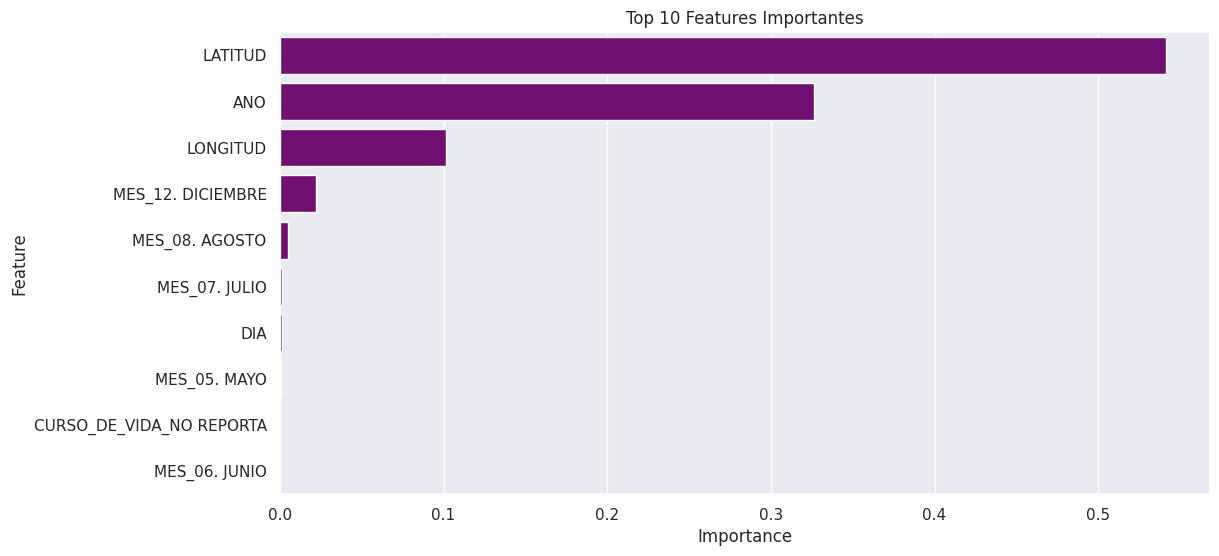

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), color = 'purple')
plt.title('Top 10 Features Importantes')
plt.show()

## **ANÁLISIS:**

Las métricas de evaluación fueron:


*   MSE: 1378.65
*   $R^2$: 0.99996

Estos valores indican un modelo altamente preciso, con un error cuadrático medio muy bajo y un coeficiente de determinación casi perfecto.

Para el gráfico de dispersión, este muestra una excelente correlación entre los valores reales y las predicciones, similar al modelo de regresión lineal, con los puntos alineados sobre la línea.

En este modelo, la latitud y longitud indican una fuerte influencia de la ubicación geográfica en la ocurrencia de delitos. Además de obtener los siguientes resultados, las comunas con mayor número de delitos predichos son:

*   Comuna 1: Norte
*   Comuna 7: La Ciudadela
*   Comuna 5: García Rovira

Y los meses con mayor incidencia de delitos son:
1. Diciembre (Mes 12)
2. Agosto (Mes 08)
3. Julio (Mes 07)
4. Junio (Mes 06)

 Los dos valores que se salen de la línea de tendencia en las gráficas de "Predicciones vs Valores Reales" y "Predicciones vs Valores Reales por Comuna", se desvían significativamente del resto de los datos lo que podría deberse a que ciertos meses o años no siguen el patrón general capturado por el modelo.

In [ ]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 18861.968025523736
R-squared: 0.9995388559528429


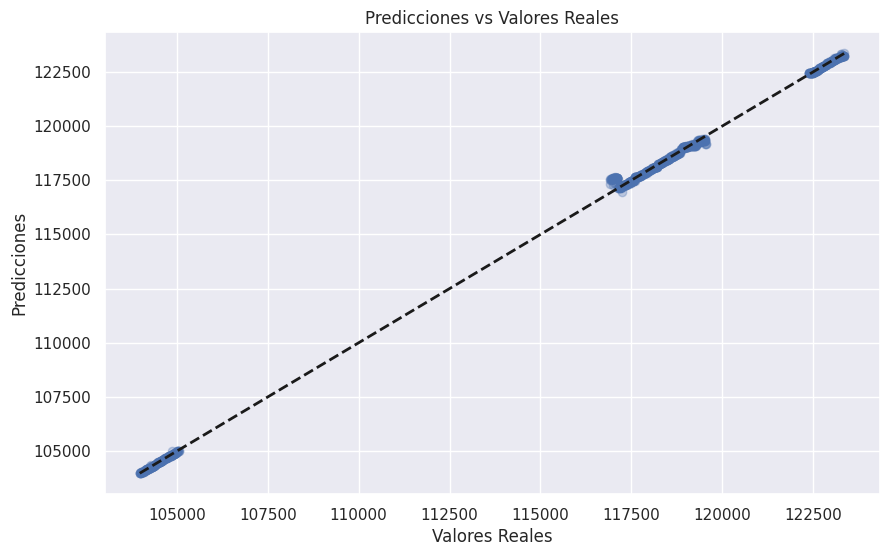

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

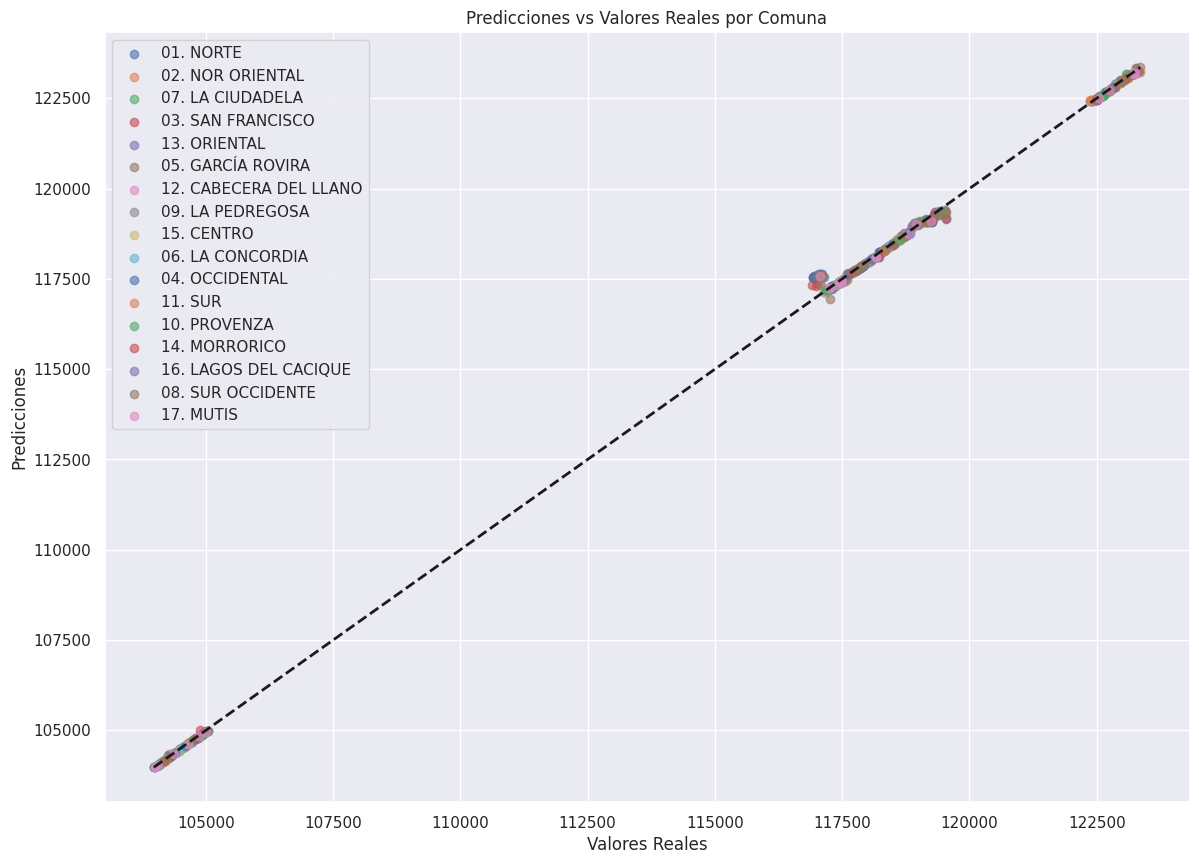

In [ ]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'NOM_COMUNA': df.loc[X_test.index, 'NOM_COMUNA']})
comunas = results['NOM_COMUNA'].unique()

plt.figure(figsize=(14, 10))

for comuna in comunas:
    data_comuna = results[results['NOM_COMUNA'] == comuna]
    plt.scatter(data_comuna['y_test'], data_comuna['y_pred'], alpha=0.6, label=comuna)

plt.plot([results['y_test'].min(), results['y_test'].max()], [results['y_test'].min(), results['y_test'].max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales por Comuna')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

results = pd.DataFrame({'NOM_COMUNA': df.loc[X_test.index, 'NOM_COMUNA'],
                        'y_test': y_test,
                        'y_pred': y_pred})
print("Resultados por Comuna:")
results

Resultados por Comuna:


NOM_COMUNA  y_test         y_pred
104159          01. NORTE  104160  104158.476940
122829   02. NOR ORIENTAL  122827  122808.555624
117000   07. LA CIUDADELA  116998  117551.594677
117099  03. SAN FRANCISCO  117096  117592.891539
104842       13. ORIENTAL  104842  104798.037523
...                   ...     ...            ...
118173  03. SAN FRANCISCO  118174  118101.584011
118927   07. LA CIUDADELA  118926  119026.550649
123062          01. NORTE  123059  123025.263840
123075     04. OCCIDENTAL  123072  123053.197010
123146  05. GARCÍA ROVIRA  123143  123108.781365

[897 rows x 3 columns]

In [ ]:
feature_importances = model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10))

                      Feature  Importance
0                     LATITUD    0.541201
2                         ANO    0.326204
1                    LONGITUD    0.101486
300         MES_12. DICIEMBRE    0.022174
299            MES_08. AGOSTO    0.005201
298             MES_07. JULIO    0.001359
3                         DIA    0.001164
296              MES_05. MAYO    0.000892
339  CURSO_DE_VIDA_NO REPORTA    0.000099
297             MES_06. JUNIO    0.000050


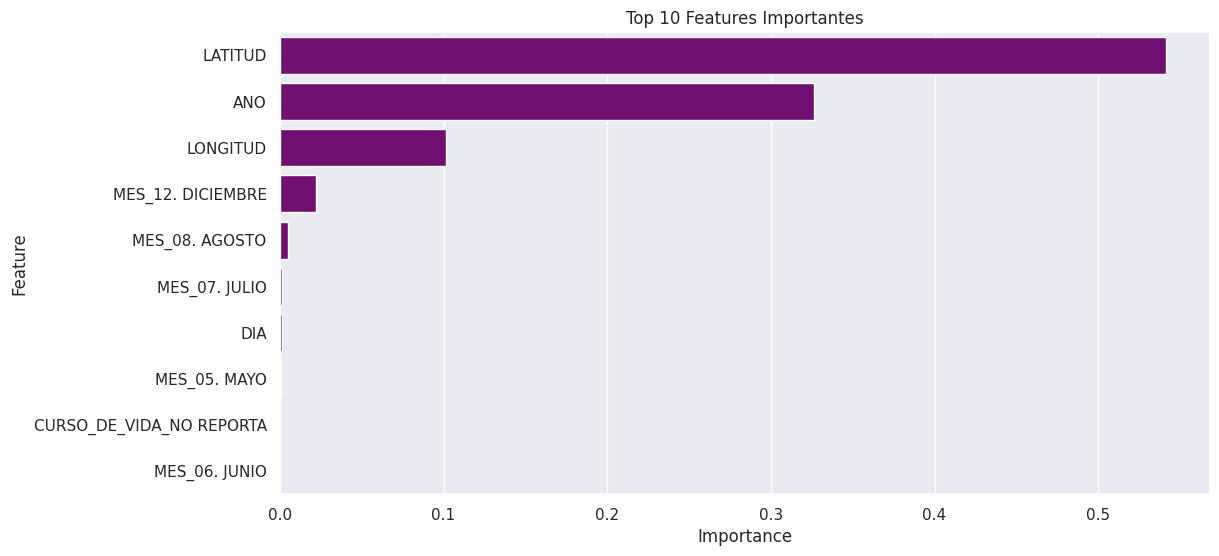

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), color='purple')
plt.title('Top 10 Features Importantes')
plt.show()

**ANALISIS:**
El rendimiento del modelo es bastante alto, con un R² cercano a 1 y un MSE bajo que sugiere que las predicciones del modelo son muy precisas.
*   MSE: 18861.9680
*   $R^2$: 0.9995

Los gráficos muestran que las predicciones están alineadas con los valores reales, ya que la línea de tendencia sigue de cerca los puntos de datos, sin embargo hay algunos valores que se desvían más.

En el gráfico de "Predicciones vs Valores Reales por Comuna," parece que las comunas 1 (NORTE) y 2 (NOR ORIENTAL) tienen puntos que se desvían más del resto, lo que sugiere que estas áreas podrían tener variabilidades que el modelo no captura completamente.

 las comunas con mayor número de delitos predichos son:

*   Comuna 1: Norte
*   Comuna 2: Nor oriental

Y los meses con mayor incidencia de delitos son:
1. Diciembre (Mes 12)
2. Agosto (Mes 08)
3. Julio (Mes 07)




**MODELOS DEEP LEARNING PARA PREDECIR HURTOS POR ZONA.**

La predicción de delitos es un problema importante en el campo de la seguridad ciudadana. La capacidad de predecir estos delitos en unas zonas determinadas de la ciudad puede ayudar a las autoridades a tomar medidas preventivas. Por eso, después de la búsqueda y análisis de un modelo de Deep Learning que se adapte y nos ayude a abordar mejor el problema, se decidió las **Redes Neuronales de Convolución de Grafos o (GCN)**.


Los GCN son una clase de redes neuronales que se utilizan para procesar y analizar datos estructurados en forma de **grafos**, como redes sociales, grafos de conocimiento, grafos de transporte, entre otros. Estas redes neuronales son capaces de aprender patrones y relaciones en los datos de grafos y realizar tareas como clasificación, clustering, regresión, entre otras.

En el contexto del análisis de delitos, las GCN permiten aprender patrones y relaciones entre los casos de delito, lo que puede ayudar a identificar zonas geográficas con alta concentración de delitos, detectar patrones de comportamiento de los agresores y establecer conexiones entre casos de delito que no estaban inicialmente relacionados.


---
#**CONCLUSIONES GENERALES**
---


*   El RandomForestRegressor es el mejor modelo en términos de precisión y menor error de predicción.
*   El RandomForestRegressor es altamente confiable para predecir la incidencia de delitos.
*   Sobre las caracteristicas más importantes se encontró que para los tres modelos la latitud, longitud y año, seguidos de algunos meses son los más consistentes
*   Los meses que muestran una mayor importancia son diciembre, agosto y julio, lo que sugiere patrones estacionales en la incidencia de delitos.
*   Las comunas NORTE (Comuna 01) y NOR ORIENTAL (Comuna 02) tienen una mayor probabilidad de delitos según los modelos.

## Sugerencias:

El objetivo principal de este trabajo era desarrollar un modelo de regresión lineal para predecir la cantidad de delitos en las diferentes zonas del municipio de Bucaramanga e identificar las variables predictoras más significativas que influyen en la cantidad de delitos en cada zona del Municipio de Bucaramanga. A partir del análisis de los datos, se recomendaria enfocar recursos de seguridad en las comunas NORTE y NOR ORIENTAL. Al igual que implementar medidas de prevención de delitos especialmente en los meses de diciembre, agosto y julio.



#📖ANEXOS

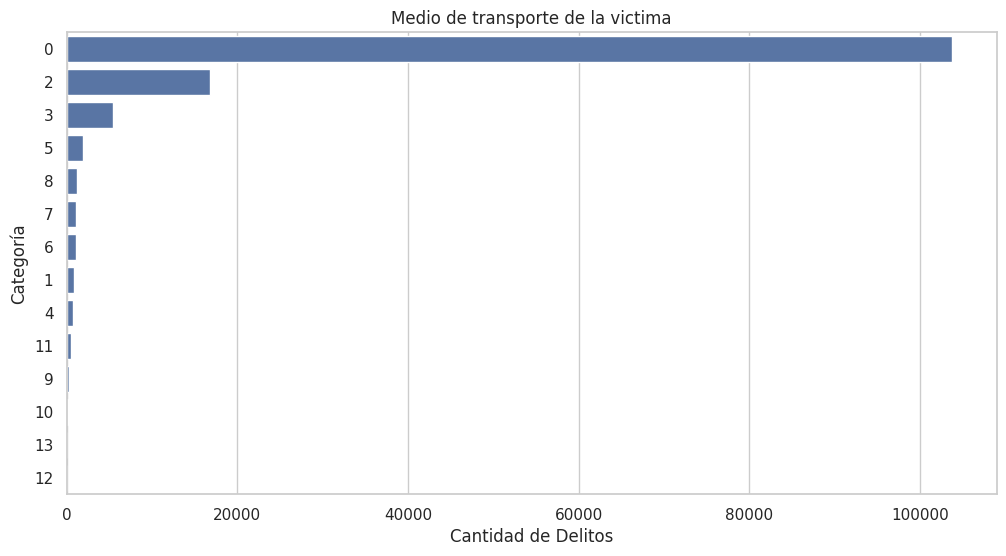

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y='MOVIL_VICTIMA', data=df, order=df['MOVIL_VICTIMA'].value_counts().index)
plt.title('Medio de transporte de la victima')
plt.xlabel('Cantidad de Delitos')
plt.ylabel('Categoría')
plt.show()

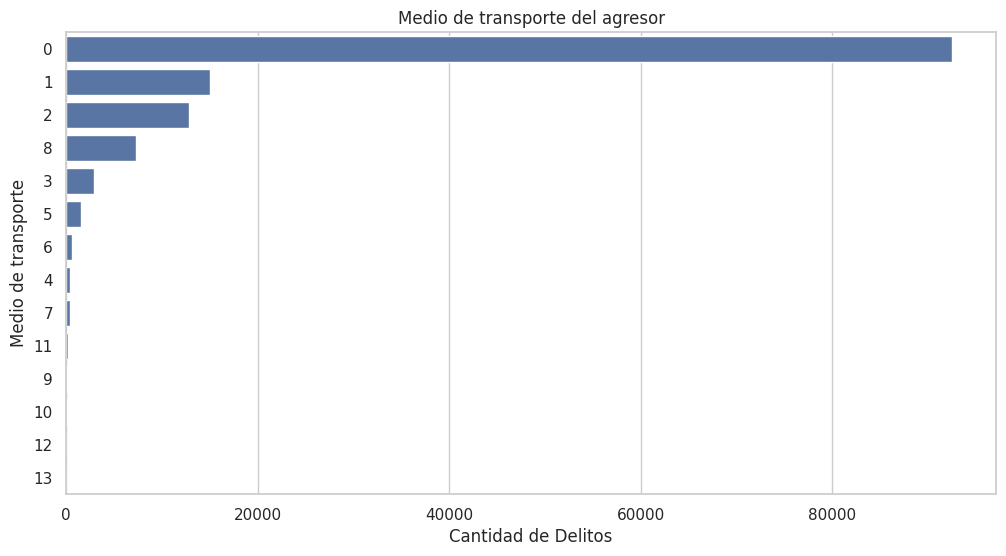

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y='MOVIL_AGRESOR', data=df, order=df['MOVIL_AGRESOR'].value_counts().index)
plt.title('Medio de transporte del agresor')
plt.xlabel('Cantidad de Delitos')
plt.ylabel('Medio de transporte')
plt.show()